<a href="https://colab.research.google.com/github/Tecindes/ChallengeONE__/blob/main/TelecomX_parte2_latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛠️ Preparación de los Datos

## Extracción del archivo tratado

In [1]:
import pandas as pd
# URL raw del archivo CSV
url_csv = 'https://raw.githubusercontent.com/Tecindes/ChallengeONE__/refs/heads/main/reporte.csv'


# Cargar el CSV como DataFrame
df = pd.read_csv(url_csv)

## Eliminación de columnas irrelevantes

In [2]:
df.drop(['customerID','customer.SeniorCitizen','ChurnLabel'], axis=1, inplace=True)


In [3]:
df.rename({'SeniorLabel':'customer.SeniorCitizen'}, axis=1, inplace=True)


## Encoding

### Clasificación de variables

In [4]:
def clasificar_variable(col):
    if pd.api.types.is_numeric_dtype(col):
        return 'Cuantitativa continua' if col.nunique() > 10 else 'Cuantitativa discreta'
    elif col.nunique() == 2:
        return 'Cualitativa binaria'
    elif pd.api.types.is_object_dtype(col):
        return 'Cualitativa nominal u ordinal'
    else:
        return 'Tipo desconocido'

def generar_reporte(df, nombre_archivo='reporte_variables.md'):
    with open(nombre_archivo, 'w', encoding='utf-8') as f:
        f.write(f'# Clasificación de Variables\n\n')
        for col in df.columns:
            tipo = clasificar_variable(df[col])
            f.write(f"- **{col}**: {tipo}\n")

In [5]:
clasificacion = df.apply(clasificar_variable)
clasificacion

,0
Churn,Cualitativa binaria
customer.gender,Cualitativa binaria
customer.Partner,Cualitativa binaria
customer.Dependents,Cualitativa binaria
customer.tenure,Cuantitativa continua
phone.PhoneService,Cualitativa binaria
phone.MultipleLines,Cualitativa nominal u ordinal
internet.InternetService,Cualitativa nominal u ordinal
internet.OnlineSecurity,Cualitativa nominal u ordinal
internet.OnlineBackup,Cualitativa nominal u ordinal


In [6]:
def clasificar_simple_variable(col):
    if pd.api.types.is_numeric_dtype(col):
        return 'Cuantitativa'
    elif col.nunique() == 2:
        return 'Cualitativa'
    elif pd.api.types.is_object_dtype(col):
        return 'Cualitativa'
    else:
        return 'Desconocido'

In [7]:
Cualitativa=[]
Cuantitativa=[]


for col in df.columns:
    tipo = clasificar_simple_variable(df[col])
    if tipo == 'Cuantitativa':
        Cuantitativa.append(col)
    elif tipo == 'Cualitativa':
        Cualitativa.append(col)

print(Cualitativa)
print(Cuantitativa)


['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'customer.SeniorCitizen']
['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']


### Tabla de frecuencia para las variables cualitativas

In [8]:
for col in Cualitativa:
  print(f'Columna :{col}, Dato : {sorted(df[col].unique())}'	)

Columna :Churn, Dato : ['No', 'Yes']
Columna :customer.gender, Dato : ['Female', 'Male']
Columna :customer.Partner, Dato : ['No', 'Yes']
Columna :customer.Dependents, Dato : ['No', 'Yes']
Columna :phone.PhoneService, Dato : ['No', 'Yes']
Columna :phone.MultipleLines, Dato : ['No', 'No phone service', 'Yes']
Columna :internet.InternetService, Dato : ['DSL', 'Fiber optic', 'No']
Columna :internet.OnlineSecurity, Dato : ['No', 'No internet service', 'Yes']
Columna :internet.OnlineBackup, Dato : ['No', 'No internet service', 'Yes']
Columna :internet.DeviceProtection, Dato : ['No', 'No internet service', 'Yes']
Columna :internet.TechSupport, Dato : ['No', 'No internet service', 'Yes']
Columna :internet.StreamingTV, Dato : ['No', 'No internet service', 'Yes']
Columna :internet.StreamingMovies, Dato : ['No', 'No internet service', 'Yes']
Columna :account.Contract, Dato : ['Month-to-month', 'One year', 'Two year']
Columna :account.PaperlessBilling, Dato : ['No', 'Yes']
Columna :account.Payment

In [9]:
dis_frec_cualitativa_dict = {}
for col in Cualitativa:
    frecuencia = df[col].value_counts()
    porcentaje = df[col].value_counts(normalize=True).round(4) * 100
    dis_frec_cualitativa_dict[col] = pd.DataFrame({
        'Frecuencia': frecuencia,
        'Porcentaje %': porcentaje
    })


In [10]:
for col in Cualitativa:
 print(f'{dis_frec_cualitativa_dict[col]} \n')


       Frecuencia  Porcentaje %
Churn                          
No           5174         73.46
Yes          1869         26.54 

                 Frecuencia  Porcentaje %
customer.gender                          
Male                   3555         50.48
Female                 3488         49.52 

                  Frecuencia  Porcentaje %
customer.Partner                          
No                      3641          51.7
Yes                     3402          48.3 

                     Frecuencia  Porcentaje %
customer.Dependents                          
No                         4933         70.04
Yes                        2110         29.96 

                    Frecuencia  Porcentaje %
phone.PhoneService                          
Yes                       6361         90.32
No                         682          9.68 

                     Frecuencia  Porcentaje %
phone.MultipleLines                          
No                         3390         48.13
Yes                 

In [11]:
dis_frec_cualitativa_Churn_dict = {}
for col in Cualitativa:
    Cross = pd.crosstab(df['Churn'],df[col],aggfunc='mean', values=df['account.Charges.Total'])
    dis_frec_cualitativa_Churn_dict[col] = Cross

In [12]:
for col in Cualitativa:
 print(f'Media del account.Charges.Total:\n {dis_frec_cualitativa_Churn_dict[col]} \n')

Media del account.Charges.Total:
 Churn           No          Yes
Churn                          
No     2549.911442          NaN
Yes            NaN  1531.796094 

Media del account.Charges.Total:
 customer.gender       Female         Male
Churn                                    
No               2588.966046  2511.987562
Yes              1440.979499  1623.491559 

Media del account.Charges.Total:
 customer.Partner           No          Yes
Churn                                     
No                1827.486542  3195.150805
Yes               1088.980292  2326.084529 

Media del account.Charges.Total:
 customer.Dependents           No          Yes
Churn                                        
No                   2516.262478  2613.852018
Yes                  1465.871646  1843.825000 

Media del account.Charges.Total:
 phone.PhoneService           No          Yes
Churn                                       
No                  1764.628906  2636.154397
Yes                  687.087941  16

### Tabla de frecuencias para las variables cuantitativas

In [13]:
for col in Cuantitativa:
  print(f'Columna: {col}, Unicos: {df[col].unique()}'	)
  print(f'Columna: {col}, Valores:{df[col].value_counts()}\n')

Columna: customer.tenure, Unicos: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
Columna: customer.tenure, Valores:customer.tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

Columna: account.Charges.Monthly, Unicos: [65.6  59.9  73.9  ... 91.75 68.8  67.85]
Columna: account.Charges.Monthly, Valores:account.Charges.Monthly
20.05     61
19.85     45
19.95     44
19.90     44
19.70     43
          ..
113.45     1
117.50     1
116.15     1
62.55      1
116.20     1
Name: count, Length: 1585, dtype: int64

Columna: account.Charges.Total, Unicos: [ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ]
Columna: account.Charges.Total, Valores:account.Charges.Total
20.20      11
0.00       11
19.75       9
19.90      

In [14]:
for col in Cuantitativa:
  print(f'Columna: {col}, Mínimo: {df[col].min()}'	)
  print(f'Columna: {col}, Máximo: {df[col].max()}')

Columna: customer.tenure, Mínimo: 0
Columna: customer.tenure, Máximo: 72
Columna: account.Charges.Monthly, Mínimo: 18.25
Columna: account.Charges.Monthly, Máximo: 118.75
Columna: account.Charges.Total, Mínimo: 0.0
Columna: account.Charges.Total, Máximo: 8684.8


In [15]:
import math
import numpy as np
n=df.shape[0]                  # Número total de datos individuales
k=round(1+(10/3)*np.log10(n))  # Regla de Sturges
dis_frec_cuantitativa_dict_sturges={}
for col in Cuantitativa:
  frec = pd.value_counts(pd.cut(x=df[col],
                                       bins=k,
                                       include_lowest=True))
  porc = pd.value_counts(pd.cut(x=df[col],
                                       bins=k,
                                       include_lowest=True),normalize=True).round(4) * 100
  dis_frec_cuantitativa_dict_sturges[col] = pd.DataFrame({
        'Frecuencia': frec,
        'Porcentaje %': porc
    })



/tmp/ipython-input-1512735629.py:7: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frec = pd.value_counts(pd.cut(x=df[col],
/tmp/ipython-input-1512735629.py:10: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  porc = pd.value_counts(pd.cut(x=df[col],
/tmp/ipython-input-1512735629.py:7: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frec = pd.value_counts(pd.cut(x=df[col],
/tmp/ipython-input-1512735629.py:10: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  porc = pd.value_counts(pd.cut(x=df[col],
/tmp/ipython-input-1512735629.py:7: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value

In [16]:
dis_frec_cuantitativa_dict_sturges['customer.tenure'].sort_index(ascending=False)

,Frecuencia,Porcentaje %
customer.tenure,,
"(66.857, 72.0]",944,13.40
"(61.714, 66.857]",387,5.49
"(56.571, 61.714]",344,4.88
"(51.429, 56.571]",362,5.14
"(46.286, 51.429]",334,4.74
"(41.143, 46.286]",316,4.49
"(36.0, 41.143]",314,4.46
"(30.857, 36.0]",401,5.69
"(25.714, 30.857]",352,5.00


In [17]:
dis_frec_cuantitativa_dict_sturges

{'customer.tenure':                   Frecuencia  Porcentaje %
 customer.tenure                           
 (-0.073, 5.143]         1371         19.47
 (66.857, 72.0]           944         13.40
 (5.143, 10.286]          599          8.50
 (10.286, 15.429]         500          7.10
 (20.571, 25.714]         411          5.84
 (15.429, 20.571]         408          5.79
 (30.857, 36.0]           401          5.69
 (61.714, 66.857]         387          5.49
 (51.429, 56.571]         362          5.14
 (25.714, 30.857]         352          5.00
 (56.571, 61.714]         344          4.88
 (46.286, 51.429]         334          4.74
 (41.143, 46.286]         316          4.49
 (36.0, 41.143]           314          4.46,
 'account.Charges.Monthly':                               Frecuencia  Porcentaje %
 account.Charges.Monthly                               
 (18.148999999999997, 25.429]        1511         21.45
 (68.5, 75.679]                       748         10.62
 (82.857, 90.036]        

### Histogramas

In [18]:
import seaborn as sns

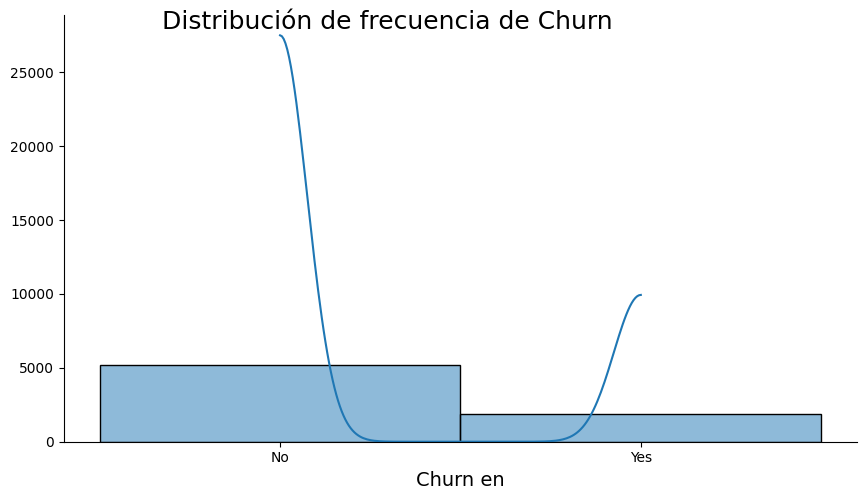

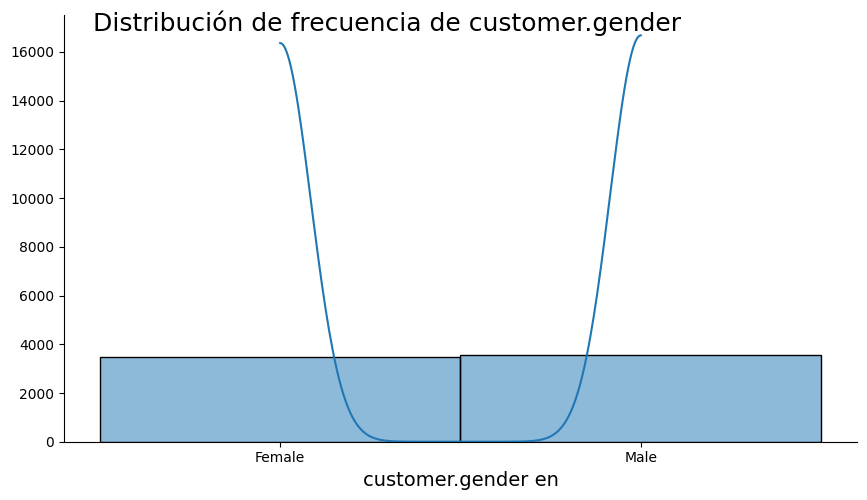

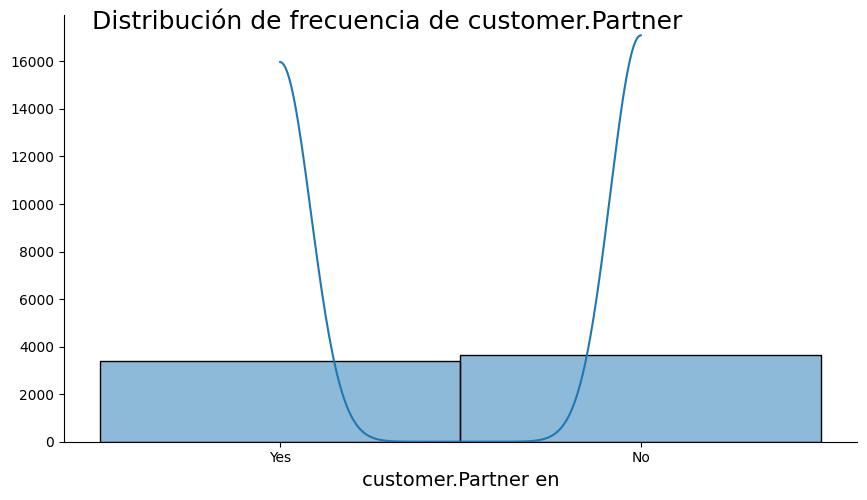

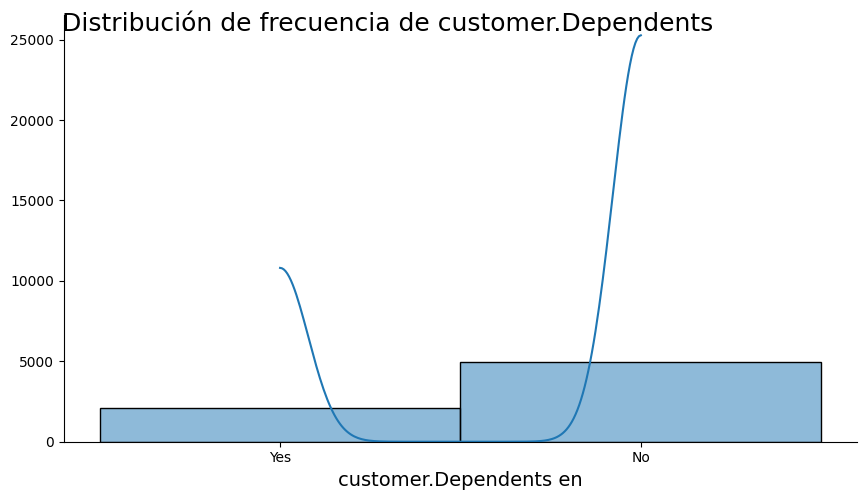

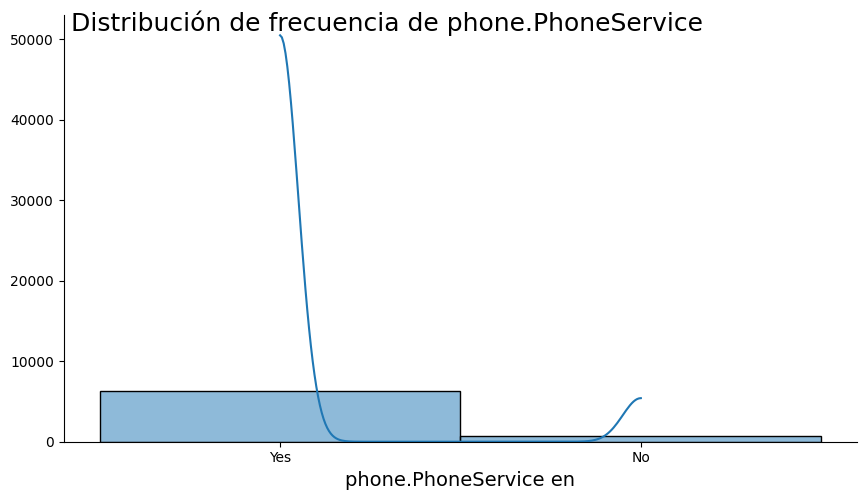

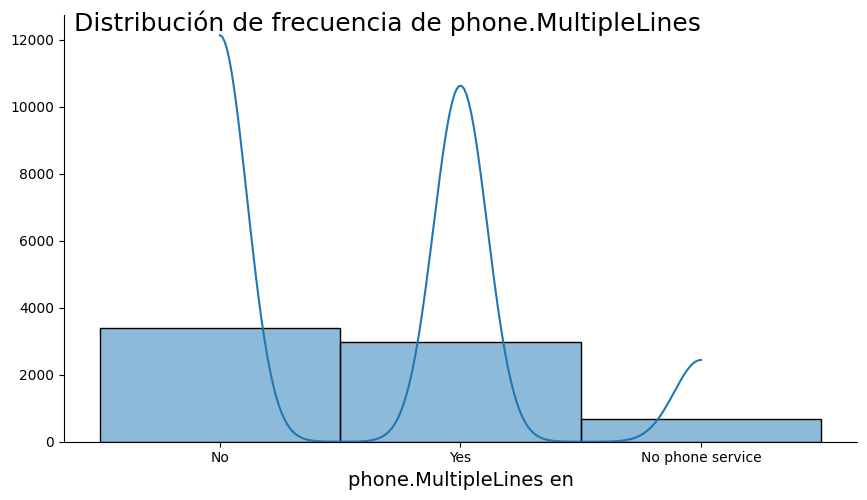

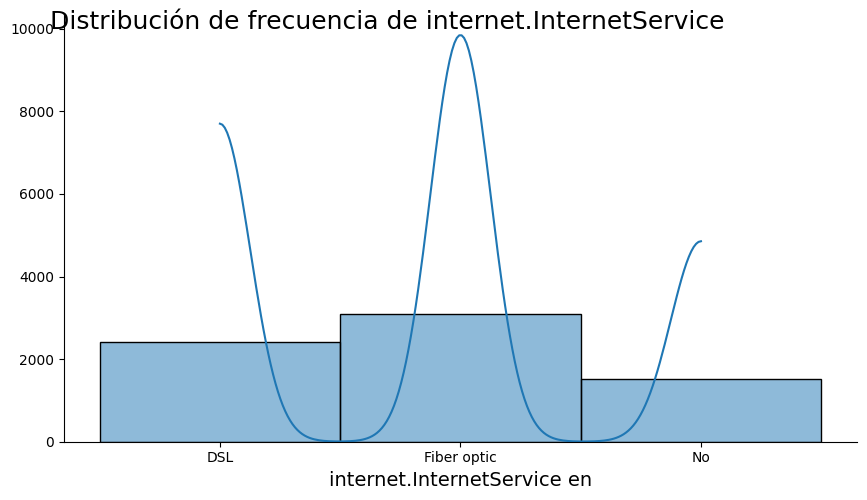

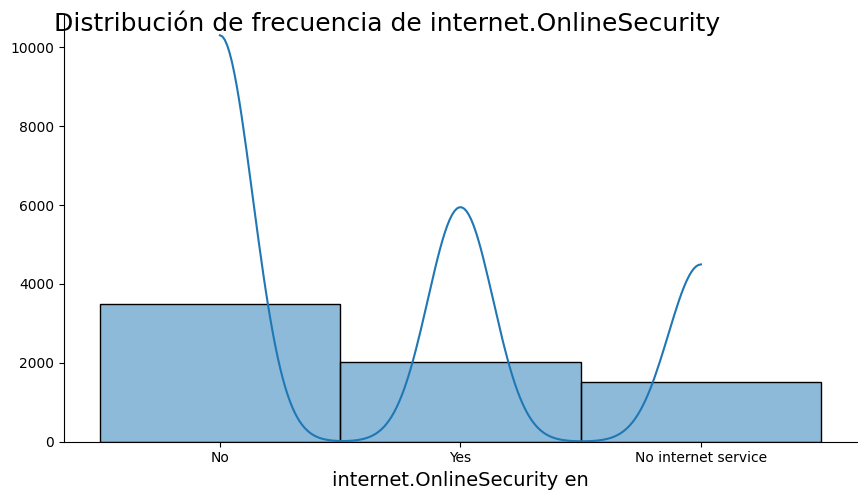

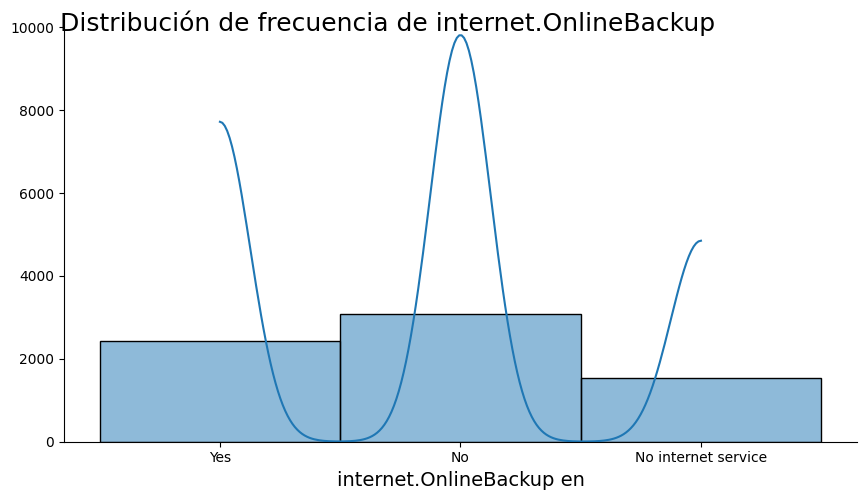

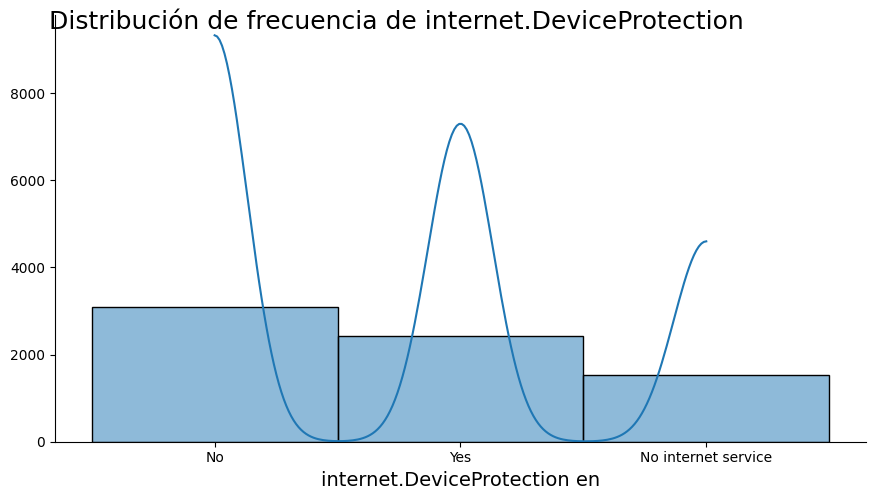

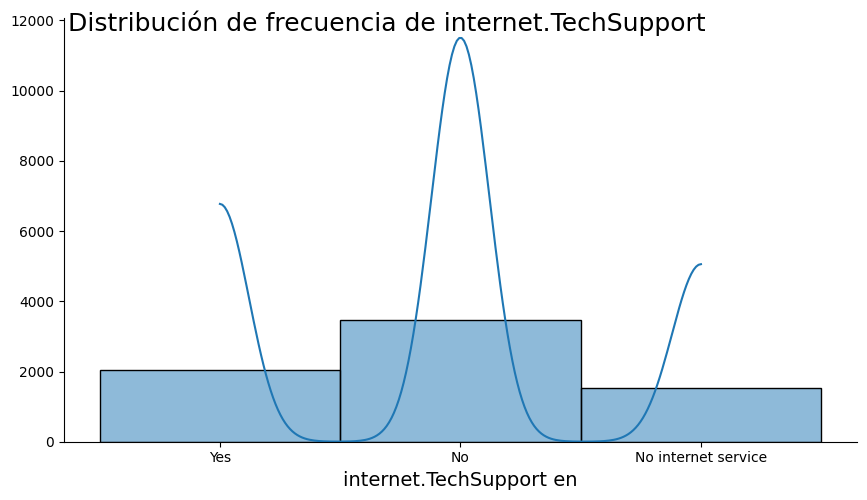

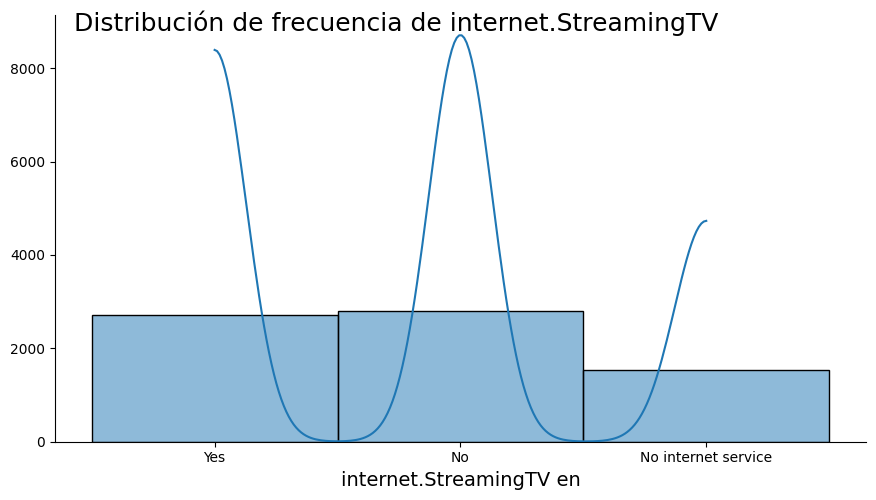

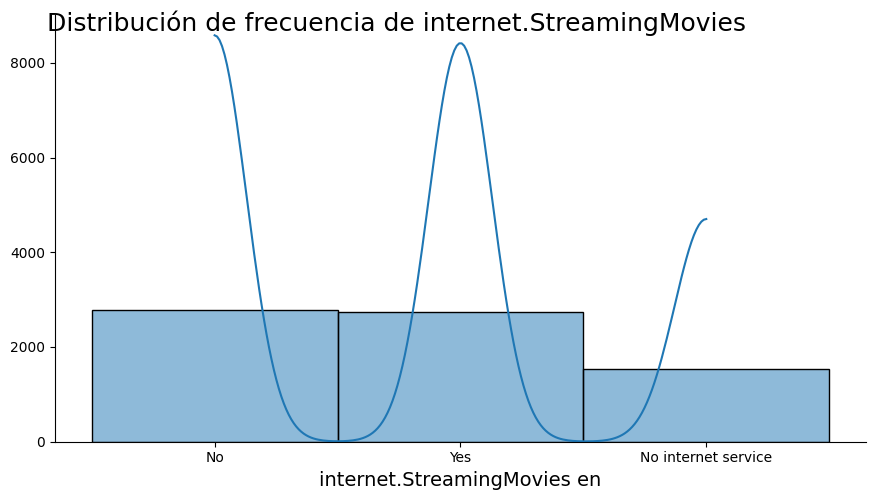

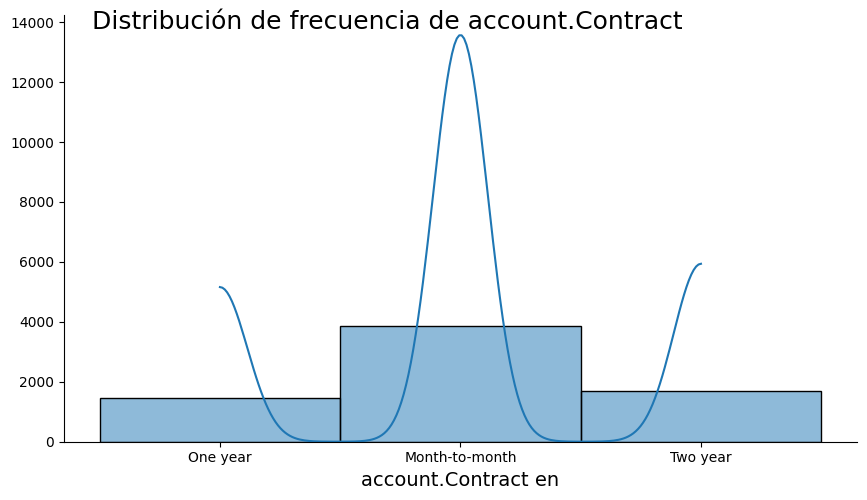

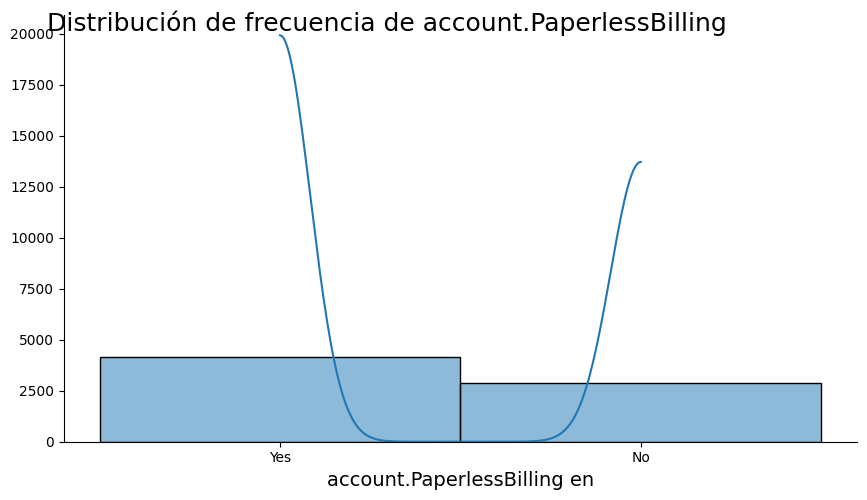

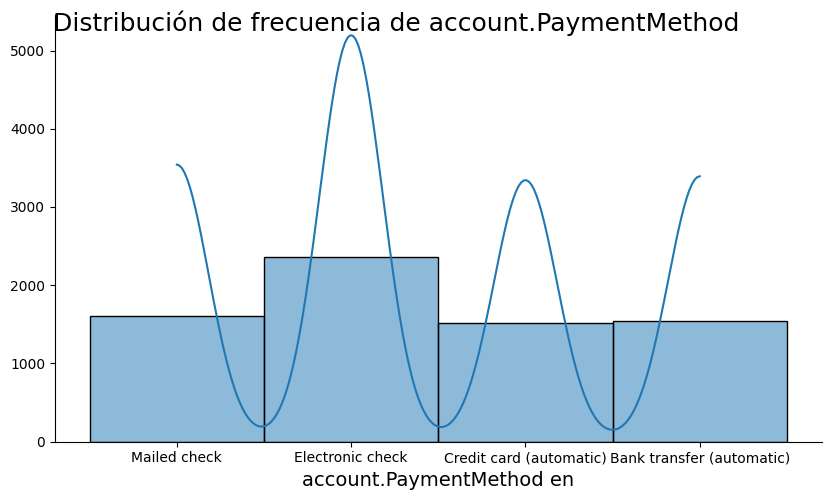

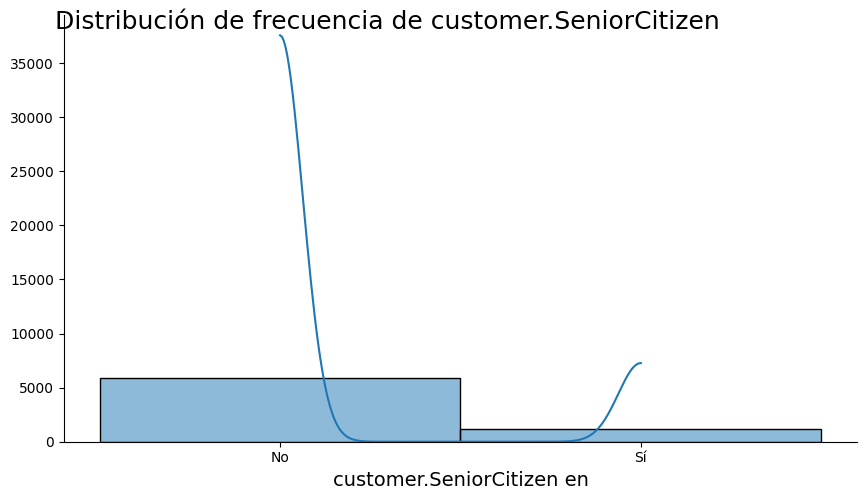

In [19]:
for col in Cualitativa:
 ax = sns.displot(data=df, x=col, kde=True)
 ax.fig.set_size_inches(10,5)
 ax.fig.suptitle(f'Distribución de frecuencia de {col}', fontsize=18)
 ax.set_xlabels(f'{col} en', fontsize=14)
 ax.set_ylabels(f'', fontsize=14)
 ax
 print(f'\n')


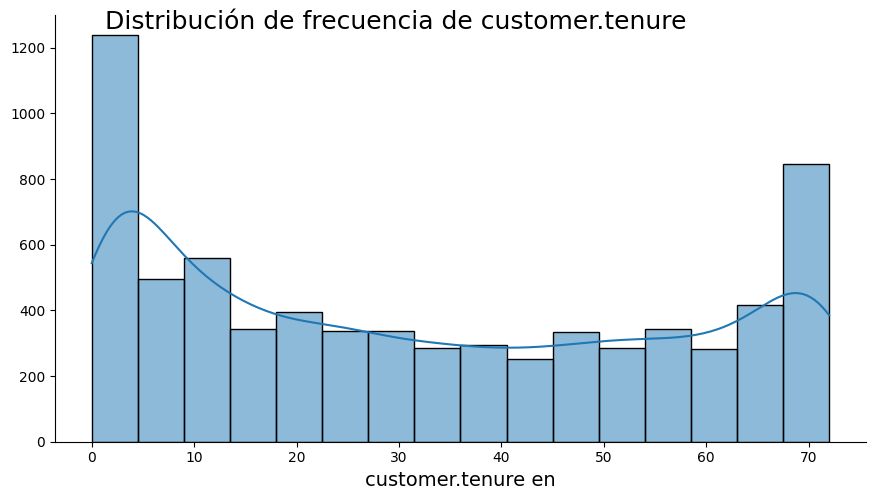

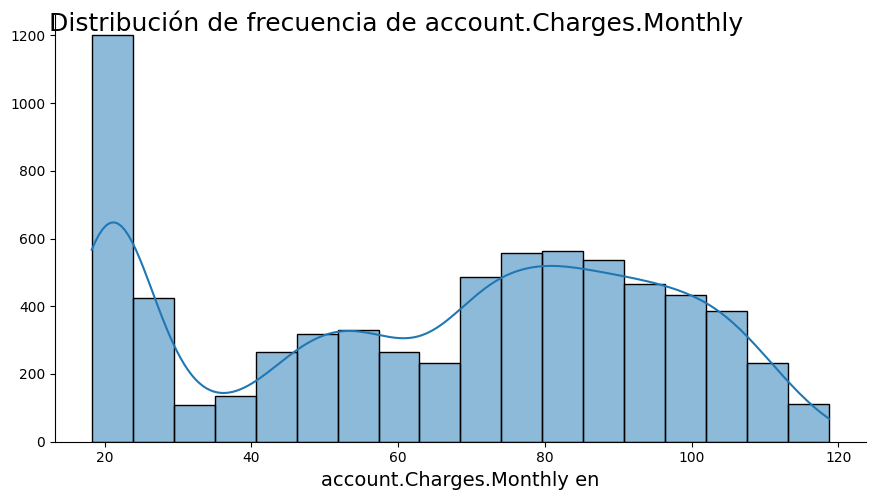

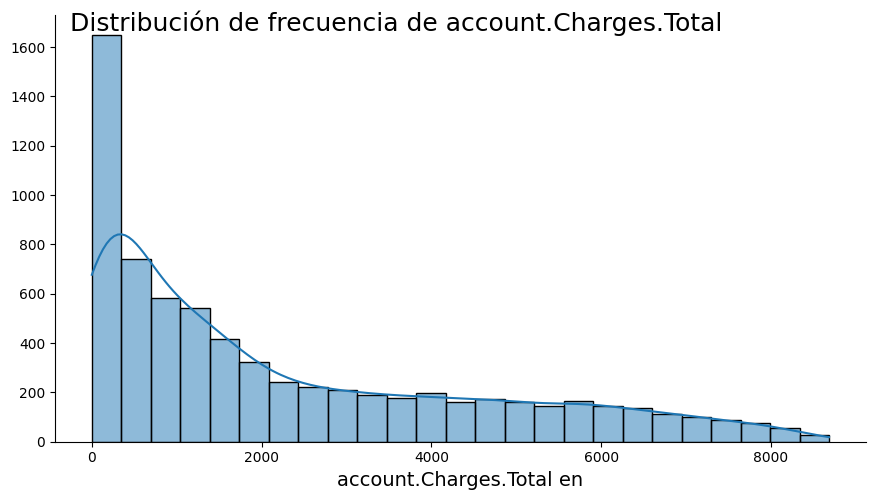

In [20]:
for col in Cuantitativa:
 ax = sns.displot(data=df, x=col, kde=True)
 ax.fig.set_size_inches(10,5)
 ax.fig.suptitle(f'Distribución de frecuencia de {col}', fontsize=18)
 ax.set_xlabels(f'{col} en', fontsize=14)
 ax.set_ylabels(f'', fontsize=14)
 ax
 print(f'\n')

### Medidas de tendencia central

In [21]:
for col_cl in Cualitativa:
  for col_ct in Cuantitativa:
    print(f'Promedio de {col_cl} contra {col_ct}\n {df.groupby([col_cl])[col_ct].mean()}\n\n')

Promedio de Churn contra customer.tenure
 Churn
No     37.569965
Yes    17.979133
Name: customer.tenure, dtype: float64


Promedio de Churn contra account.Charges.Monthly
 Churn
No     61.265124
Yes    74.441332
Name: account.Charges.Monthly, dtype: float64


Promedio de Churn contra account.Charges.Total
 Churn
No     2549.911442
Yes    1531.796094
Name: account.Charges.Total, dtype: float64


Promedio de customer.gender contra customer.tenure
 customer.gender
Female    32.244553
Male      32.495359
Name: customer.tenure, dtype: float64


Promedio de customer.gender contra account.Charges.Monthly
 customer.gender
Female    65.204243
Male      64.327482
Name: account.Charges.Monthly, dtype: float64


Promedio de customer.gender contra account.Charges.Total
 customer.gender
Female    2279.918062
Male      2279.554008
Name: account.Charges.Total, dtype: float64


Promedio de customer.Partner contra customer.tenure
 customer.Partner
No     23.357869
Yes    42.017637
Name: customer.tenure,

### one-hot encoding

In [22]:
exclude_columns = ['Churn']
columns_to_encode = [col for col in Cualitativa if col not in exclude_columns]
columns_to_encode

['customer.gender',
 'customer.Partner',
 'customer.Dependents',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod',
 'customer.SeniorCitizen']

In [23]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np

def preprocess_data(df, cat_columns, drop_first=True):
    df_encoded = pd.get_dummies(df, columns=cat_columns, drop_first=drop_first)
    return df_encoded

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    report = {
        'ROC AUC': roc_auc_score(y_test, y_prob),
        'Confusion Matrix': confusion_matrix(y_test, y_pred),
        'Classification Report': classification_report(y_test, y_pred, output_dict=True),
        'Model': model.__class__.__name__
    }
    return report

def churn_model_pipeline(df, target_column, cat_columns, drop_first=True, test_size=0.2, random_state=42):
    df_encoded = preprocess_data(df, cat_columns, drop_first)

    X = df_encoded.drop(columns=[target_column])
    y = df_encoded[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    models = [LogisticRegression(max_iter=1000), RandomForestClassifier()]
    results = {}

    for model in models:
        results[model.__class__.__name__] = evaluate_model(model, X_train, X_test, y_train, y_test)

    return results

In [24]:
resultados = churn_model_pipeline(df, "Churn", columns_to_encode, drop_first=True)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
for modelo, reporte in resultados.items():
    print(f"\nModelo: {modelo}")
    print(f"ROC AUC: {reporte['ROC AUC']:.3f}")
    print("Matriz de Confusión:\n", reporte['Confusion Matrix'])


Modelo: LogisticRegression
ROC AUC: 0.841
Matriz de Confusión:
 [[937  99]
 [172 201]]

Modelo: RandomForestClassifier
ROC AUC: 0.821
Matriz de Confusión:
 [[942  94]
 [201 172]]


#### Analizando con : drop_first=True


| **Métrica**                    | **LogisticRegression** | **RandomForest** | **Comentario**                                      |
|-------------------------------|-------------------------|------------------|-----------------------------------------------------|
| ROC AUC                       | 0.841                   | 0.819            | Regresión logística discrimina mejor                |
| TP (Verdaderos positivos)     | 201                     | 171              | Regresión detecta más churn reales                  |
| FP (Falsos positivos)         | 99                      | 85               | RandomForest comete menos falsos positivos          |
| FN (Falsos negativos)         | 172                     | 202              | RandomForest falla más en detectar Churn            |
| TN (Verdaderos negativos)     | 937                     | 951              | RandomForest clasifica mejor los no Churn           |

🔎 Interpretación:
- LogisticRegression tuvo mejor ROC AUC y detectó más churn reales → eso indica que las relaciones entre tus variables y el churn son suficientemente lineales.
- RandomForest no mejoró el desempeño, y de hecho tuvo más falsos negativos → no captó patrones adicionales que Logistic ya hubiera perdido.

✅ Conclusión técnica
Sí conviene usar codificación con drop_first=True, porque:

- Estás alimentando un modelo lineal (LogisticRegression)
- El modelo lineal rindió igual o mejor que el no lineal
- No necesitas todas las dummies explícitas para capturar patrones complejos


#### Analizando con : drop_first=False

In [26]:
resultados = churn_model_pipeline(df, "Churn", columns_to_encode, drop_first=False)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
for modelo, reporte in resultados.items():
    print(f"\nModelo: {modelo}")
    print(f"ROC AUC: {reporte['ROC AUC']:.3f}")
    print("Matriz de Confusión:\n", reporte['Confusion Matrix'])


Modelo: LogisticRegression
ROC AUC: 0.841
Matriz de Confusión:
 [[937  99]
 [172 201]]

Modelo: RandomForestClassifier
ROC AUC: 0.815
Matriz de Confusión:
 [[943  93]
 [194 179]]


📊 Resultados obtenidos

🔹 LogisticRegression (drop_first=False)
- ROC AUC: 0.841 (igual que con drop_first=True)
- TP: 201
- FN: 172

🔹 RandomForestClassifier (drop_first=False)
- ROC AUC: 0.812 (↓ respecto a drop_first=True)
- TP: 169 (↓)
- FN: 204 (↑)

🧠 Interpretación técnica
1. Modelo lineal no se ve afectado
- El ROC AUC no cambió al mantener todas las dummies → el modelo lineal no se benefició de tener más columnas.
- Esto indica que no hay colinealidad crítica, pero tampoco hay ganancia en precisión.
2. Modelo no lineal empeoró
- RandomForest tuvo menor ROC AUC y más falsos negativos.
- Esto sugiere que mantener todas las dummies introdujo ruido o redundancia, afectando la capacidad del modelo de generalizar.


#### ✅ Conclusión
usar drop_first=True es la opción más eficiente y robusta:

- El modelo lineal no pierde desempeño con menos dummies.
- El modelo no lineal empeora al tener todas las dummies.
- No se detectan interacciones complejas que justifiquen mantener todas las categorías explícitas.
- LogisticRegression es suficiente y más confiable en este caso

#### Encoding

In [28]:
# --- Verificar si alguna columna cualitativa es numérica
print("📌 Columnas cualitativas que en realidad son numéricas:")
for col in Cualitativa:
    if pd.api.types.is_numeric_dtype(df[col]):
        print(f" - {col} (numérica detectada)")

# --- Verificar si alguna columna cuantitativa es texto
print("\n📌 Columnas cuantitativas que en realidad NO son numéricas:")
for col in Cuantitativa:
    if not pd.api.types.is_numeric_dtype(df[col]):
        print(f" - {col} (no numérica detectada)")

📌 Columnas cualitativas que en realidad son numéricas:

📌 Columnas cuantitativas que en realidad NO son numéricas:


In [29]:
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

### Verificación de la proporción de cancelacion (Churn)

In [30]:
dis_frec_cualitativa_dict['Churn']

,Frecuencia,Porcentaje %
Churn,,
No,5174,73.46
Yes,1869,26.54


La clase minoritaria (ej. Churn = Yes) representa menos del 30% del total.

Este desbalance puede afectar al modelo Logistic Regression, que tiende a favorecer la clase mayoritaria si no se corrige, se considerara aplicar técnicas de balanceo.





### Balanceo de clases

In [31]:
!pip install imbalanced-learn

Adaptaremos el flujo para que SMOTE (Balanceo de clases )esté dentro del pipeline, lo que te permitirá hacer validación cruzada reproducible, evitar data leakage, y mantener trazabilidad para auditoría.


### Normalización o Estandarización (si es necesario)

- Modelo: LogisticRegression
- ¿Requiere escalado?: Si
- ¿Por que? : Aunque es lineal, los coeficientes dependen de escala

📌 Recomendación para el flujo.

Se trabajara con pipelines que incluyen SMOTE y escalado, ya que buscamos reproducibilidad y trazabilidad, usaremos max_iter=1000 para evitar warnings y asegurar convergencia.




In [32]:
df_encoded['Churn'] = df_encoded['Churn'].map({'No': 0, 'Yes': 1})


In [33]:
# ✅ Preparación de datos
X = df_encoded.drop(columns=["Churn"])
y = df_encoded["Churn"]

In [34]:
# Función para graficar porcentajes
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from collections import Counter
import matplotlib.pyplot as plt

def plot_distribution(y_values, title):
    counts = Counter(y_values)
    total = sum(counts.values())
    percentages = {k: (v / total) * 100 for k, v in counts.items()}

    plt.bar(percentages.keys(), percentages.values(), color=["skyblue", "salmon"])
    plt.xticks([0, 1], ["No Churn", "Churn"])
    plt.ylabel("Porcentaje (%)")
    plt.title(title)

    # Etiquetas sobre cada barra
    for k, v in percentages.items():
        plt.text(k, v + 1, f"{v:.1f}%", ha='center', fontsize=10)

    plt.ylim(0, 100)
    plt.show()

📌 Distribución original: Counter({0: 5174, 1: 1869})


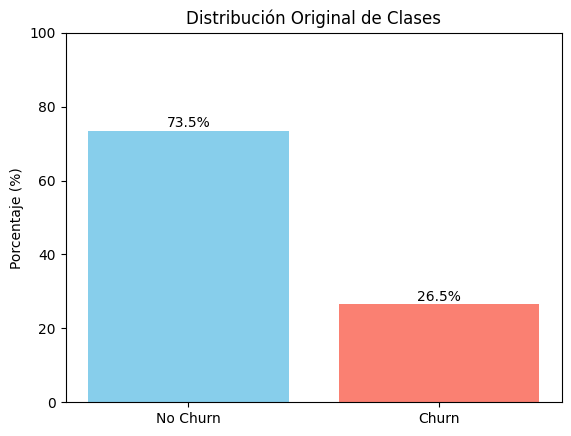

In [35]:
# 📊 Distribución original
print("📌 Distribución original:", Counter(y))
plot_distribution(y, "Distribución Original de Clases")

In [36]:
# 4️⃣ División en train/test estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

📌 Distribución después de SMOTE: Counter({0: 4139, 1: 4139})


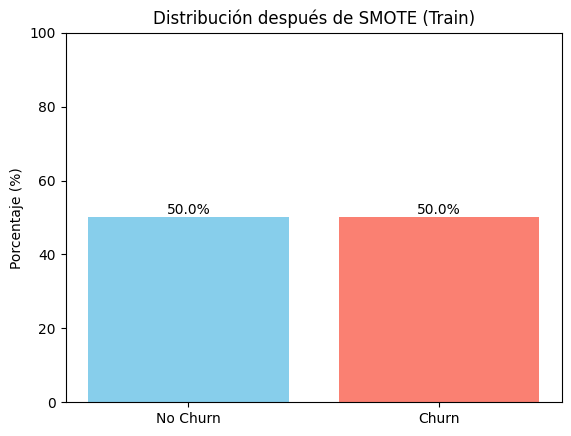

In [37]:
# 5️⃣ Aplicar SMOTE y mostrar cambio
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("📌 Distribución después de SMOTE:", Counter(y_train_res))
plot_distribution(y_train_res, "Distribución después de SMOTE (Train)")

In [38]:
# 6️⃣ Función para construir pipeline
from imblearn.pipeline import Pipeline as ImbPipeline # Importar con alias
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

def build_pipeline(model):
    return ImbPipeline([ # Usar ImbPipeline
        ('smote', SMOTE(random_state=42)),
        ('scaler', StandardScaler()),
        ('model', model)
    ])

In [39]:
# 7️⃣ Modelos
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipeline_lr = build_pipeline(LogisticRegression(max_iter=1000))
pipeline_rf = build_pipeline(RandomForestClassifier())

In [40]:
# 8️⃣ Validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_lr = cross_val_score(pipeline_lr, X_train, y_train, cv=cv, scoring='f1')
scores_rf = cross_val_score(pipeline_rf, X_train, y_train, cv=cv, scoring='f1')

In [41]:
print(f"📊 Logistic Regression F1 scores: {scores_lr}")
print(f"📊 Random Forest F1 scores: {scores_rf}")
print(f"✅ Promedio LR: {np.mean(scores_lr)}")
print(f"✅ Promedio RF: {np.mean(scores_rf)}")

📊 Logistic Regression F1 scores: [0.59643436 0.63815789 0.59967585 0.61011419 0.60653188]
📊 Random Forest F1 scores: [0.56013746 0.62289562 0.57191781 0.56806723 0.54901961]
✅ Promedio LR: 0.6101828359467456
✅ Promedio RF: 0.5744075445786736


In [42]:
# 9️⃣ Entrenamiento final y evaluación
pipeline_lr.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)

y_pred_lr = pipeline_lr.predict(X_test)
y_pred_rf = pipeline_rf.predict(X_test)

print("\n🔹 Logistic Regression Test Set Performance")
print(classification_report(y_test, y_pred_lr))
print(f"ROC AUC: {roc_auc_score(y_test, pipeline_lr.predict_proba(X_test)[:,1]):.4f}")

print("\n🔹 Random Forest Test Set Performance")
print(classification_report(y_test, y_pred_rf))
print(f"ROC AUC: {roc_auc_score(y_test, pipeline_rf.predict_proba(X_test)[:,1]):.4f}")



🔹 Logistic Regression Test Set Performance
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1035
           1       0.57      0.63      0.59       374

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.77      0.78      1409

ROC AUC: 0.8258

🔹 Random Forest Test Set Performance
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1035
           1       0.58      0.57      0.58       374

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409

ROC AUC: 0.8139


In [43]:
# 🔟 (Opcional) Grid Search para optimización y ranking
param_grid_lr = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ['l2']
}

grid_lr = GridSearchCV(
    pipeline_lr,
    param_grid_lr,
    cv=cv,
    scoring='f1',
    n_jobs=-1,
    return_train_score=True
)

grid_lr.fit(X_train, y_train)

# 📌 Mejor configuración
print("\n🏆 Mejor configuración para Logistic Regression:", grid_lr.best_params_)
print(f"Mejor F1 en validación: {grid_lr.best_score_:.4f}")

# 📊 Ranking de resultados
results_df = pd.DataFrame(grid_lr.cv_results_)
ranking = results_df[
    ["param_model__C", "param_model__penalty", "mean_test_score", "std_test_score"]
].sort_values(by="mean_test_score", ascending=False)

print("\n📊 Ranking de combinaciones probadas:")
print(ranking.to_string(index=False))


🏆 Mejor configuración para Logistic Regression: {'model__C': 0.1, 'model__penalty': 'l2'}
Mejor F1 en validación: 0.6104

📊 Ranking de combinaciones probadas:
 param_model__C param_model__penalty  mean_test_score  std_test_score
           0.10                   l2         0.610366        0.014620
           1.00                   l2         0.610183        0.014801
          10.00                   l2         0.607213        0.013851
           0.01                   l2         0.601144        0.014226


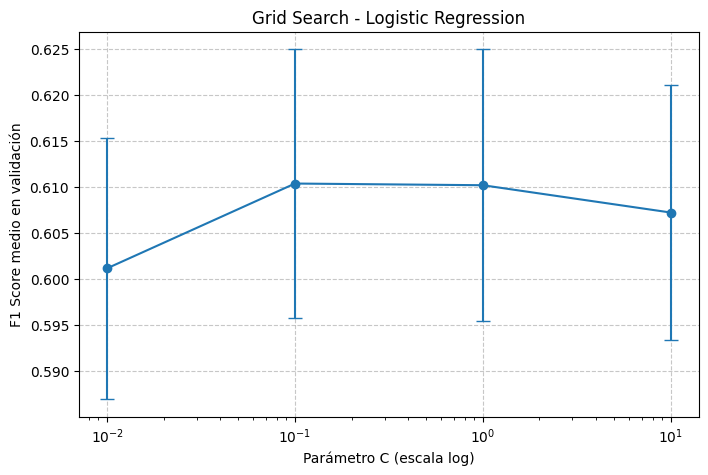

In [44]:
# Extraer resultados del GridSearch
results_df = pd.DataFrame(grid_lr.cv_results_)

# Filtrar columnas de interés
plot_df = results_df[["param_model__C", "mean_test_score", "std_test_score"]]

# Graficar
plt.figure(figsize=(8,5))
plt.errorbar(
    plot_df["param_model__C"],  # valores de C
    plot_df["mean_test_score"], # puntaje F1 medio
    yerr=plot_df["std_test_score"], # barras de error
    fmt='o-', capsize=5
)
plt.xscale("log")  # Escala logarítmica para C
plt.xlabel("Parámetro C (escala log)")
plt.ylabel("F1 Score medio en validación")
plt.title("Grid Search - Logistic Regression")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


📌 La regresión logística supera al Random Forest en este caso, lo cual sugiere que la relación entre variables podría ser más lineal de lo esperado.


# 🎯 Correlación y Selección de Variables

## Análisis de Correlación

In [45]:
# Convertir booleanos a int
df_encoded = df_encoded.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)

# Convertir a numéricas las columnas object que sean dummies (0/1 como texto)
df_encoded = df_encoded.apply(lambda col: pd.to_numeric(col, errors='ignore'))

df_encoded['Churn'] = df_encoded['Churn'].astype(int)

/tmp/ipython-input-1917193604.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_encoded = df_encoded.apply(lambda col: pd.to_numeric(col, errors='ignore'))


In [46]:
# Separar variables numéricas y excluir el target
num_cols = df_encoded.select_dtypes(include=[np.number]).columns
num_cols = num_cols.drop('Churn')


In [47]:
# Calcular la matriz de correlación
corr_matrix = df_encoded[num_cols.tolist() + ['Churn']].corr()


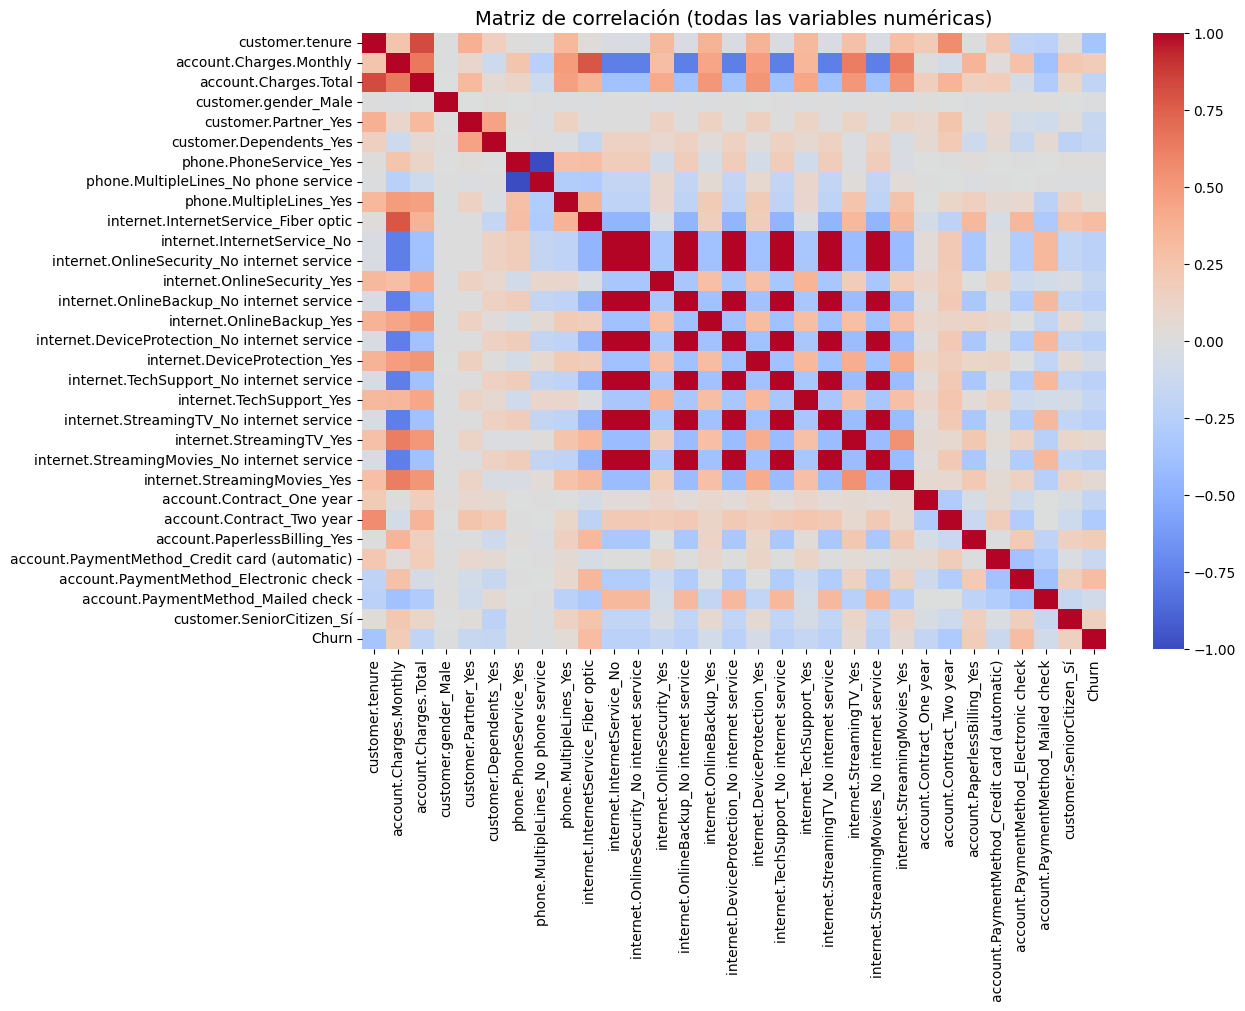

In [48]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Matriz de correlación (todas las variables numéricas)", fontsize=14)
plt.show()

In [49]:
# Correlación con Churn y ordenar por magnitud (valor absoluto)
churn_corr = corr_matrix['Churn'].drop('Churn').sort_values(key=np.abs, ascending=False)
print(churn_corr)

customer.tenure                                 -0.352229
internet.InternetService_Fiber optic             0.308020
account.Contract_Two year                       -0.302253
account.PaymentMethod_Electronic check           0.301919
internet.InternetService_No                     -0.227890
internet.OnlineSecurity_No internet service     -0.227890
internet.TechSupport_No internet service        -0.227890
internet.DeviceProtection_No internet service   -0.227890
internet.StreamingTV_No internet service        -0.227890
internet.StreamingMovies_No internet service    -0.227890
internet.OnlineBackup_No internet service       -0.227890
account.Charges.Total                           -0.198324
account.Charges.Monthly                          0.193356
account.PaperlessBilling_Yes                     0.191825
account.Contract_One year                       -0.177820
internet.OnlineSecurity_Yes                     -0.171226
internet.TechSupport_Yes                        -0.164674
customer.Depen

In [50]:
umbral = 0.2
variables_relevantes = churn_corr[abs(churn_corr) > umbral]
print("\n🔍 Variables con correlación significativa con Churn:")
print(variables_relevantes)


🔍 Variables con correlación significativa con Churn:
customer.tenure                                 -0.352229
internet.InternetService_Fiber optic             0.308020
account.Contract_Two year                       -0.302253
account.PaymentMethod_Electronic check           0.301919
internet.InternetService_No                     -0.227890
internet.OnlineSecurity_No internet service     -0.227890
internet.TechSupport_No internet service        -0.227890
internet.DeviceProtection_No internet service   -0.227890
internet.StreamingTV_No internet service        -0.227890
internet.StreamingMovies_No internet service    -0.227890
internet.OnlineBackup_No internet service       -0.227890
Name: Churn, dtype: float64


/tmp/ipython-input-815368004.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


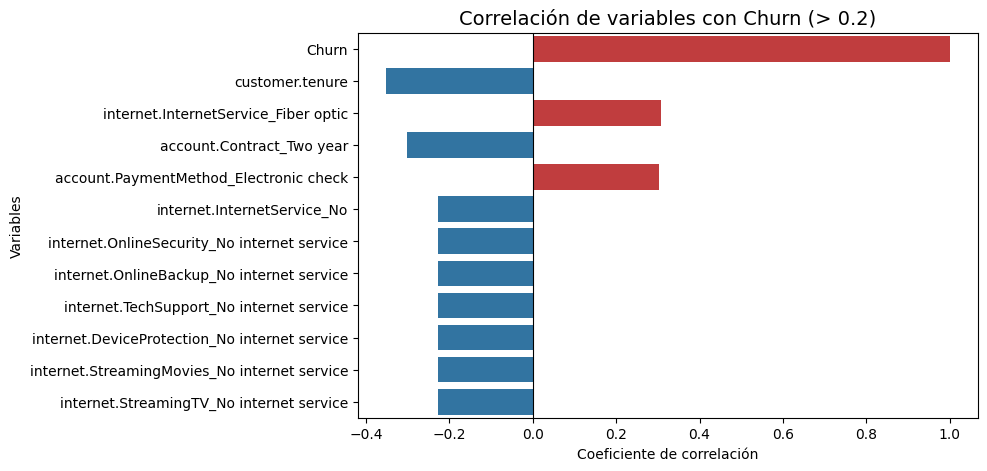

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Correlación solo con Churn ---
churn_corr = df_encoded.corrwith(df_encoded['Churn'])

# Filtrar por umbral
umbral = 0.2
variables_relevantes = churn_corr[abs(churn_corr) > umbral].sort_values(key=abs, ascending=False)

# --- Visualización ordenada ---
plt.figure(figsize=(8, 5))
sns.barplot(
    x=variables_relevantes.values,
    y=variables_relevantes.index,
    palette=["#d62728" if x > 0 else "#1f77b4" for x in variables_relevantes.values]
)

plt.title("Correlación de variables con Churn (> 0.2)", fontsize=14)
plt.xlabel("Coeficiente de correlación")
plt.ylabel("Variables")
plt.axvline(0, color='black', linewidth=0.8)
plt.show()


## Análisis Dirigido

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, mannwhitneyu


In [53]:
def churn_rate(y):
    """Tasa de churn (y=1)."""
    return np.mean(y)

def plot_churn_rate_by_dummy(df, dummy_col, target='Churn'):
    """Compara tasa de churn cuando la dummy=1 vs 0."""
    rates = df.groupby(df[dummy_col].astype(int))[target].mean().rename({0:'0 (No)',1:'1 (Sí)'})
    plt.figure(figsize=(5,3.5))
    bars = plt.bar(rates.index.astype(str), rates.values)
    for b, v in zip(bars, rates.values):
        plt.text(b.get_x() + b.get_width()/2, v, f"{v:.2%}", ha='center', va='bottom')
    plt.title(f"Tasa de churn por {dummy_col}")
    plt.ylabel("Churn rate")
    plt.ylim(0, max(0.15, rates.max()*1.15))
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.show()
    return rates

def plot_churn_rate_by_bins(df, col, bins, labels=None, target='Churn'):
    """Churn rate por bins de una variable continua (ej: tenure, MonthlyCharges)."""
    cats = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    rates = df.groupby(cats)[target].mean()
    plt.figure(figsize=(6,3.8))
    bars = plt.bar(rates.index.astype(str), rates.values)
    plt.xticks(rotation=30, ha='right')
    for b, v in zip(bars, rates.values):
        plt.text(b.get_x()+b.get_width()/2, v, f"{v:.2%}", ha='center', va='bottom')
    plt.title(f"Tasa de churn por rangos de {col}")
    plt.ylabel("Churn rate")
    plt.ylim(0, max(0.15, rates.max()*1.15))
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()
    return rates

def heatmap_churn_rate_2x2(df, col_a, col_b, target='Churn', labels_a=('0','1'), labels_b=('0','1')):
    """Matriz 2x2 de churn rate (dos dummies)."""
    pivot = df.pivot_table(values=target, index=df[col_a].astype(int), columns=df[col_b].astype(int), aggfunc='mean')
    plt.figure(figsize=(4.2,3.6))
    plt.imshow(pivot, aspect='auto')
    plt.xticks([0,1], [f"{labels_b[0]}", f"{labels_b[1]}"])
    plt.yticks([0,1], [f"{labels_a[0]}", f"{labels_a[1]}"])
    for (i,j), v in np.ndenumerate(pivot.values):
        plt.text(j, i, f"{v:.1%}", ha='center', va='center', color='white' if v>0.15 else 'black', fontsize=11)
    plt.colorbar(label='Churn rate')
    plt.title(f"Churn rate: {col_a} vs {col_b}")
    plt.tight_layout()
    plt.show()
    return pivot

def chi_square_for_dummy(df, dummy_col, target='Churn'):
    """Chi-cuadrado para asociación entre dummy (0/1) y Churn (0/1)."""
    tab = pd.crosstab(df[dummy_col].astype(int), df[target].astype(int))
    chi2, p, dof, _ = chi2_contingency(tab)
    return print(f'chi2: {chi2}, \np_value: {p}, \ndof: {dof}, \ntabla de contingencia:\n {tab}')

def mannwhitney_for_continuous_vs_churn(df, col, target='Churn'):
    """Prueba no paramétrica (Mann-Whitney) para comparar distribución de col entre churn=0 y churn=1."""
    a = df.loc[df[target]==0, col].dropna()
    b = df.loc[df[target]==1, col].dropna()
    stat, p = mannwhitneyu(a, b, alternative='two-sided')
    return print(f'stat: {stat}, p_value: {p}, n0: {len(a)}, n1:{len(b)}, median0: {a.median()}, median1: {b.median()}')


### 1) Línea base: tasa de churn global

In [54]:
base_rate = churn_rate(df_encoded['Churn'])
print(f"🔹 Churn global: {base_rate:.2%}")


🔹 Churn global: 26.54%


26.54% es muy alto, probablemente se está perdiendo clientes de forma importante.

### 2) Variables continuas clave (ej.: tenure, cargos)

#### 2.1 Tenure (bins sugeridos para interpretar)

/tmp/ipython-input-2783043405.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rates = df.groupby(cats)[target].mean()


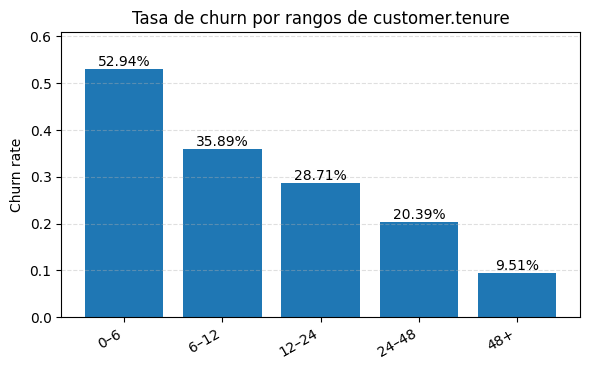

Mann-Whitney tenure:
stat: 7154668.0, p_value: 2.419635517951866e-208, n0: 5174, n1:1869, median0: 38.0, median1: 10.0


In [55]:
bins_tenure = [0, 6, 12, 24, 48, df_encoded['customer.tenure'].max()]
labels_tenure = ['0–6', '6–12', '12–24', '24–48', '48+']
tenure_rates = plot_churn_rate_by_bins(df_encoded, 'customer.tenure', bins=bins_tenure, labels=labels_tenure)

# Prueba de diferencia de distribuciones (churn vs no-churn)
print(f'Mann-Whitney tenure:')
tenure_test = mannwhitney_for_continuous_vs_churn(df_encoded, 'customer.tenure')


/tmp/ipython-input-1453020907.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='customer.tenure', data=df_encoded, palette='Set2')


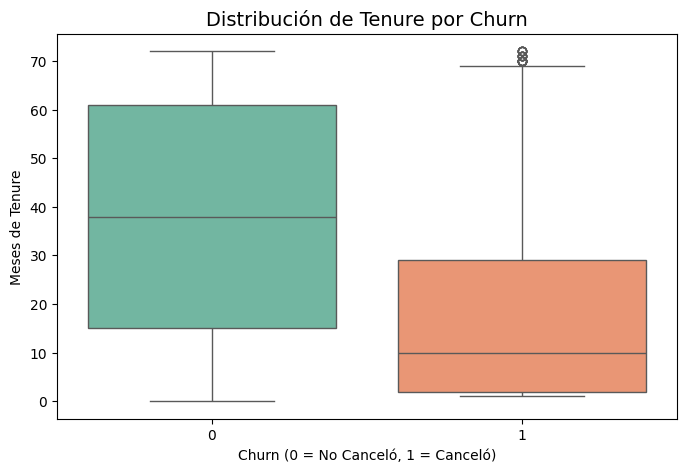

In [56]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='customer.tenure', data=df_encoded, palette='Set2')
plt.title('Distribución de Tenure por Churn', fontsize=14)
plt.xlabel('Churn (0 = No Canceló, 1 = Canceló)')
plt.ylabel('Meses de Tenure')
plt.show()



/tmp/ipython-input-2832196670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Churn', y='customer.tenure', data=df, palette='Set2', inner='quartile')


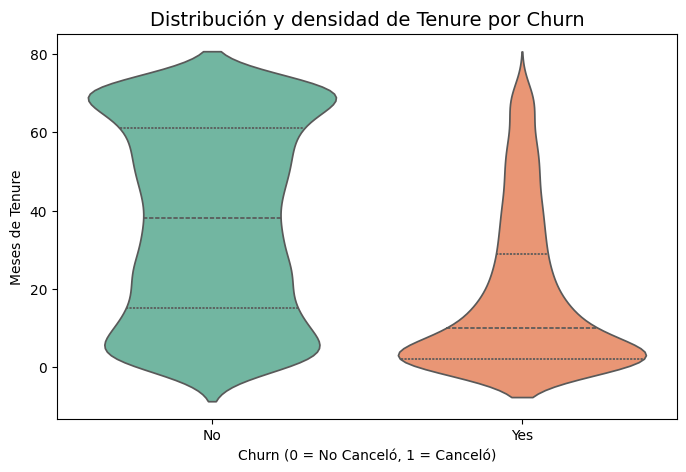

In [57]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Churn', y='customer.tenure', data=df, palette='Set2', inner='quartile')
plt.title('Distribución y densidad de Tenure por Churn', fontsize=14)
plt.xlabel('Churn (0 = No Canceló, 1 = Canceló)')
plt.ylabel('Meses de Tenure')
plt.show()


Interpretación de los valores

- stat: 7154668.0
Es el estadístico U calculado por el test. Por sí solo no dice mucho; lo importante es compararlo con el p_value.


- p_value: 2.4196e-208
Este es el valor clave. Es extremadamente pequeño (≈ 0.000... con 207 ceros antes de un número distinto de cero).
→ Esto significa que la diferencia en las distribuciones de tenure entre churn y no churn es estadísticamente significativa con muchísima evidencia.
En términos simples: la probabilidad de que esta diferencia sea por azar es prácticamente cero.

- n0: 5174
Cantidad de clientes que no cancelaron.

- n1: 1869
Cantidad de clientes que sí cancelaron.

- median0: 38.0
Mediana de tenure para los que no cancelaron = 38 meses.

- median1: 10.0
Mediana de tenure para los que sí cancelaron = 10 meses.

Qué significa en lenguaje de negocio

- Los clientes que cancelan tienden a irse muy temprano: la mitad de ellos se va antes de cumplir 10 meses.

- Los clientes que permanecen llevan mucho más tiempo: la mitad lleva 38 meses o más.

- La diferencia no es un accidente estadístico, está respaldada por un p-valor extremadamente bajo.

Para qué sirve este resultado

En análisis dirigido, esto confirma que:

- tenure variable altamente discriminante para churn.

- Podría usarse como predictor clave en el modelo.

- Desde negocio, justifica diseñar estrategias para retener clientes nuevos en sus primeros meses.

#### 2.2 (Opcional) MonthlyCharges / TotalCharges

/tmp/ipython-input-2783043405.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rates = df.groupby(cats)[target].mean()


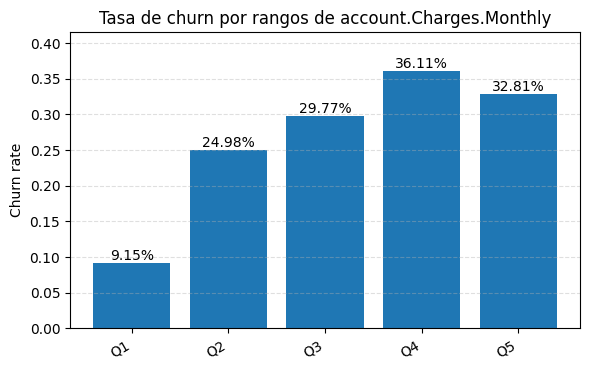

Mann-Whitney Monthly:
stat: 3667080.5, p_value: 3.311627651988585e-54, n0: 5174, n1:1869, median0: 64.42500000000001, median1: 79.65


In [58]:
# Solo si están presentes en tu df_encoded
if 'account.Charges.Monthly' in df_encoded.columns:
    bins_m = np.quantile(df_encoded['account.Charges.Monthly'].dropna(), [0, .2, .4, .6, .8, 1.])
    labels_m = ['Q1','Q2','Q3','Q4','Q5']
    monthly_rates = plot_churn_rate_by_bins(df_encoded, 'account.Charges.Monthly', bins=bins_m, labels=labels_m)
    print("Mann-Whitney Monthly:")
    mannwhitney_for_continuous_vs_churn(df_encoded, 'account.Charges.Monthly')


/tmp/ipython-input-1237439038.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_encoded, x='Churn', y='account.Charges.Monthly', palette="Set2")
/tmp/ipython-input-1237439038.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_encoded, x='Churn', y='account.Charges.Monthly', palette="Set2", inner="quartile")


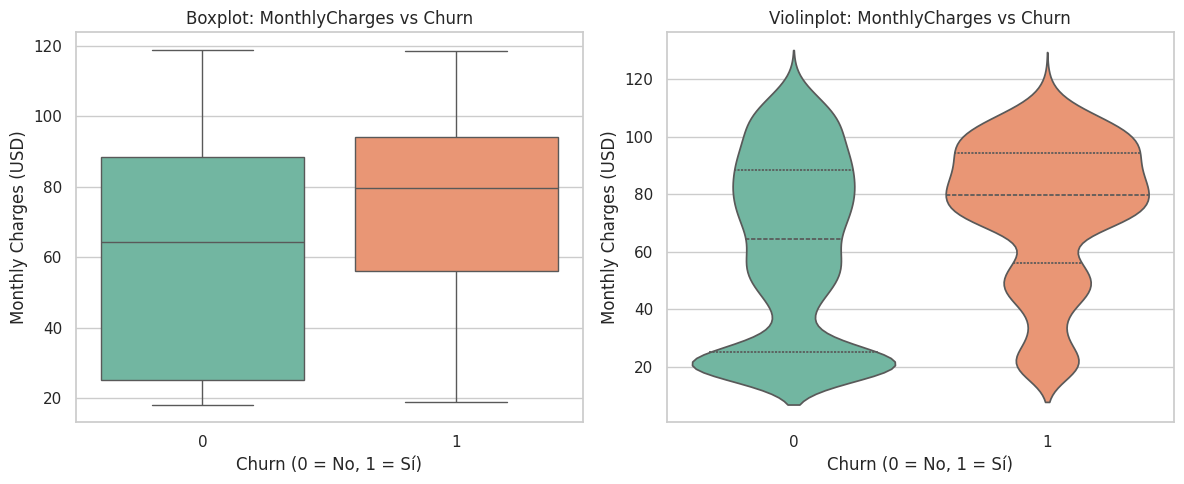

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar estilo
sns.set(style="whitegrid")

# Crear figura
plt.figure(figsize=(12,5))

# ----------------- BOX PLOT -----------------
plt.subplot(1, 2, 1)
sns.boxplot(data=df_encoded, x='Churn', y='account.Charges.Monthly', palette="Set2")
plt.title("Boxplot: MonthlyCharges vs Churn")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Monthly Charges (USD)")

# ----------------- VIOLIN PLOT -----------------
plt.subplot(1, 2, 2)
sns.violinplot(data=df_encoded, x='Churn', y='account.Charges.Monthly', palette="Set2", inner="quartile")
plt.title("Violinplot: MonthlyCharges vs Churn")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Monthly Charges (USD)")

plt.tight_layout()
plt.show()

**p-valor extremadamente pequeño**

p_value = 3.31e-54 → mucho menor que 0.05, por lo que sí existe una diferencia estadísticamente significativa entre clientes que cancelaron y los que no, respecto al monto mensual que pagan.

**Tamaño de muestra**

- n0 = 5174 → clientes que no cancelaron

- n1 = 1869 → clientes que sí cancelaron

**Medianas**

- median0 = 64.43 → los que no cancelaron pagan en promedio 64.43 USD/mes

- median1 = 79.65 → los que cancelaron pagan en promedio 79.65 USD/mes

📌 Esto significa que quienes cancelan pagan facturas mensuales más altas, lo cual podría ser un factor de riesgo de churn.

**Interpretación práctica**

Este patrón puede indicar que:

- Planes más caros generan mayor probabilidad de cancelación.

- O bien, hay un perfil de cliente de alto gasto que es más propenso a irse (quizás porque prueba servicios costosos pero no queda satisfecho).

### 3) Dummies relevantes (uno a uno)

#### 3.1 Contract_Two year (protege contra churn)

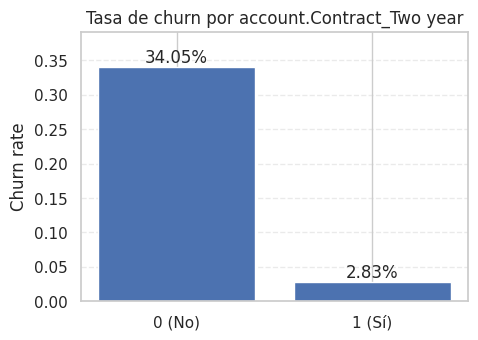

Chi-cuadrado Contract_Two year:
chi2: 641.8281150143744, 
p_value: 1.3376802517066984e-141, 
dof: 1, 
tabla de contingencia:
 Churn                         0     1
account.Contract_Two year            
0                          3527  1821
1                          1647    48


In [60]:
plot_churn_rate_by_dummy(df_encoded, 'account.Contract_Two year')
print("Chi-cuadrado Contract_Two year:")
chi_square_for_dummy(df_encoded, 'account.Contract_Two year')


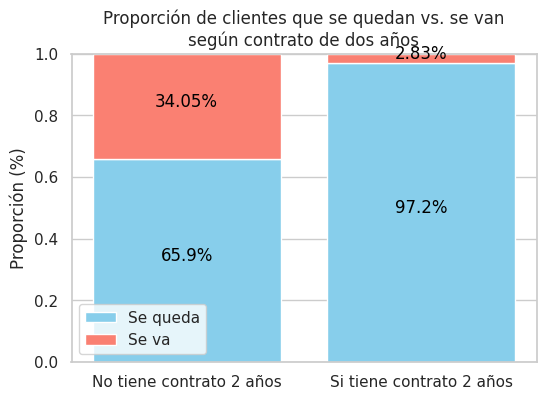

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos originales

data = {
    'Contract_Two_year': ['No tiene contrato 2 años', 'Si tiene contrato 2 años'],
    'Churn=0': [3527, 1647],
    'Churn=1': [1821, 48]
}

df_contract = pd.DataFrame(data)

# Calcular proporciones
df_contract['Churn0_pct'] = df_contract['Churn=0'] / (df_contract['Churn=0'] + df_contract['Churn=1'])
df_contract['Churn1_pct'] = df_contract['Churn=1'] / (df_contract['Churn=0'] + df_contract['Churn=1'])

# Gráfico apilado 100%
plt.figure(figsize=(6,4))
plt.bar(df_contract['Contract_Two_year'], df_contract['Churn0_pct'], color='skyblue', label='Se queda')
plt.bar(df_contract['Contract_Two_year'], df_contract['Churn1_pct'], bottom=df_contract['Churn0_pct'], color='salmon', label='Se va')

# Etiquetas
for i in range(len(df_contract)):
    plt.text(i, df_contract['Churn0_pct'][i]/2, f"{df_contract['Churn0_pct'][i]*100:.1f}%", ha='center', color='black')
    plt.text(i, df_contract['Churn0_pct'][i] + df_contract['Churn1_pct'][i]/2, f"{df_contract['Churn1_pct'][i]*100:.2f}%", ha='center', color='black')

plt.ylabel('Proporción (%)')
plt.title('Proporción de clientes que se quedan vs. se van\nsegún contrato de dos años')
plt.ylim(0, 1)
plt.legend()
plt.show()



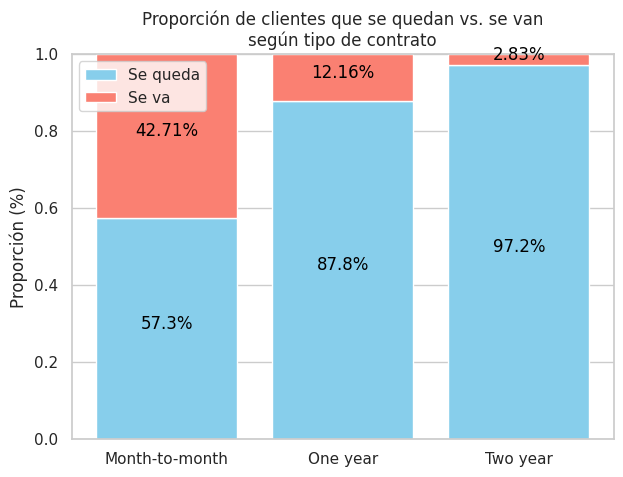

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos originales (ejemplo basado en el dataset Telco)
data = {
    'Contract': ['Month-to-month', 'One year', 'Two year'],
    'Churn=0': [2220, 1307, 1647],
    'Churn=1': [1655, 181, 48]
}

df_contract = pd.DataFrame(data)

# Calcular proporciones
df_contract['Churn0_pct'] = df_contract['Churn=0'] / (df_contract['Churn=0'] + df_contract['Churn=1'])
df_contract['Churn1_pct'] = df_contract['Churn=1'] / (df_contract['Churn=0'] + df_contract['Churn=1'])

# Gráfico apilado 100%
plt.figure(figsize=(7,5))
plt.bar(df_contract['Contract'], df_contract['Churn0_pct'], color='skyblue', label='Se queda')
plt.bar(df_contract['Contract'], df_contract['Churn1_pct'], bottom=df_contract['Churn0_pct'], color='salmon', label='Se va')

# Etiquetas de porcentaje
for i in range(len(df_contract)):
    plt.text(i, df_contract['Churn0_pct'][i]/2, f"{df_contract['Churn0_pct'][i]*100:.1f}%", ha='center', color='black')
    plt.text(i, df_contract['Churn0_pct'][i] + df_contract['Churn1_pct'][i]/2, f"{df_contract['Churn1_pct'][i]*100:.2f}%", ha='center', color='black')

plt.ylabel('Proporción (%)')
plt.title('Proporción de clientes que se quedan vs. se van\nsegún tipo de contrato')
plt.ylim(0, 1)
plt.legend()
plt.show()


> **Tipo de prueba**

- Chi-cuadrado de independencia; Sirve para evaluar si tener un contrato de dos años está relacionado (o no) con la tasa de Churn.

> **Hipótesis**

- H₀ (nula): No hay relación entre Contract_Two year y Churn.

- H₁ (alternativa): Sí hay relación (el contrato influye en la tasa de Churn).

> **Resultados estadísticos**

- chi2 = 641.83 → Valor muy alto ⇒ indica gran desviación entre lo esperado y lo observado.

- p_value = 1.33 × 10⁻¹⁴¹ → prácticamente cero ⇒ rechazamos H₀ con muchísima confianza.

- dof = 1 → Porque es una tabla 2×2.

> **Lectura de la tabla**

- Contrato de 2 años = 0 (no lo tiene):

 - Churn=0: 3527 clientes

 - Churn=1: 1821 clientes

 - Tasa de Churn: 1821 / (3527+1821) ≈ 34.0%

- Contrato de 2 años = 1 (sí lo tiene):

 - Churn=0: 1647 clientes

 - Churn=1: 48 clientes

 - Tasa de Churn: 48 / (1647+48) ≈ 2.8%

 La tasa de churn entre quienes no tienen contrato de 2 años es aprox. 12 veces mayor que entre quienes sí lo tienen.

   - Riesgo relativo (RR) ≈ 34.06 / 2.83 ≈ 12.0

   - Reducción absoluta del riesgo (ARR) ≈ 34.06% − 2.83% = 31.23 puntos porcentuales

   - Reducción relativa del riesgo (RRR) ≈ 1 − (2.83/34.06) = aprox. 91.7%

 Comparado con tu churn global (26.54%):

   - Los sin contrato 2 años están por encima del global (34% > 26.5%).

   - Los con contrato 2 años están muy por debajo (2.8% ≪ 26.5%).

> **Conclusión**

- El contrato de 2 años protege fuertemente contra el Churn.

- Los clientes con contrato de 2 años casi no se dan de baja (≈2.8%), mientras que los que no lo tienen tienen un Churn muchísimo más alto (≈34%).

- Esto es estadísticamente muy significativo y también relevante en magnitud (efecto práctico grande).

#### 3.2 PaymentMethod_Electronic check (riesgo ↑)

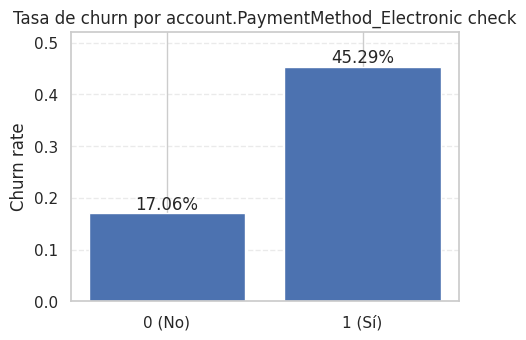

Chi-cuadrado Electronic check:
chi2: 640.557084271473, 
p_value: 2.5280301640753998e-141, 
dof: 1, 
tabla de contingencia:
 Churn                                      0     1
account.PaymentMethod_Electronic check            
0                                       3880   798
1                                       1294  1071


In [63]:
plot_churn_rate_by_dummy(df_encoded, 'account.PaymentMethod_Electronic check')
print("Chi-cuadrado Electronic check:")
chi_square_for_dummy(df_encoded, 'account.PaymentMethod_Electronic check')


**Resultados estadísticos**

- 👉 Como el p-value ≈ 2.5e-141 ≪ 0.05, rechazamos H₀ → sí existe una relación muy significativa.

**Lectura de la tabla**
- Grupo No usan cheque electrónico (0):

  - 3880 no churn, 798 churn → 798 / 4678 = 17.06% churn

- Grupo Sí usan cheque electrónico (1):

  - 1294 no churn, 1071 churn → 1071 / 2365 = 45.29% churn

**Medidas de efecto**

- Diferencia absoluta (ARR, en realidad aquí sería “incremento absoluto” porque aumenta el riesgo)

>>45.29% − 17.06% = 28.23pp

>>👉 Usar cheque electrónico aumenta el churn en ~28.2 puntos porcentuales.

- Riesgo relativo (RR)

>>RR = 17.06% / 45.29%	​≈ 2.65

>>👉 Los clientes con cheque electrónico tienen 2.65 veces más riesgo de churn que los que no lo usan.

- Aumento relativo del riesgo (RRR)

>>RRR = (RR−1) × 100 ≈ 165%

>>👉 Pagar con cheque electrónico aumenta el riesgo en ~165% relativo frente a otros métodos.

- Número necesario a “tratar” (NNT, en este caso sería NNH = Number Needed to Harm)

>>NNH = 1/0.2823 ≈ 3.5

>>👉 Por cada 3 – 4 clientes que usan cheque electrónico, 1 adicional cae en churn

**Conclusión**

- El test confirma que el método de pago tiene impacto en churn.

- Electronic check = factor de riesgo fuerte: casi triplica el riesgo.

- Dif. absoluta: +28.2 pp.

- Dif. relativa: +165%.

- NNH: 3–4 clientes expuestos generan 1 churn extra.



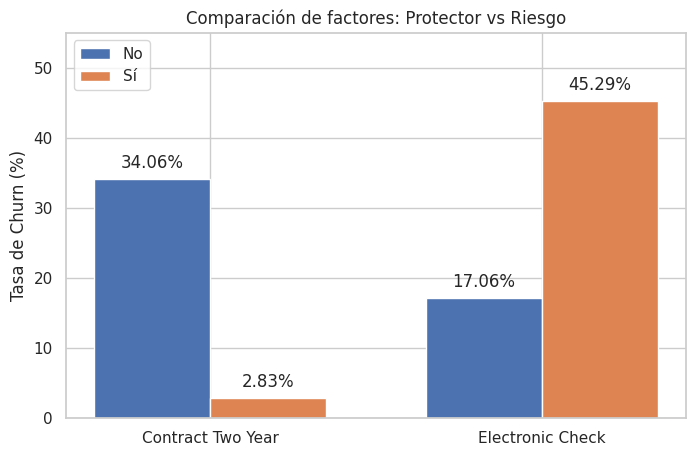

In [64]:
import matplotlib.pyplot as plt

# --- Tasas de churn calculadas ---
contract_no = 34.06   # churn si NO tiene contrato de 2 años
contract_yes = 2.83   # churn si SÍ tiene contrato de 2 años

echeck_no = 17.06     # churn si NO paga con e-check
echeck_yes = 45.29    # churn si SÍ paga con e-check

# --- Datos para graficar ---
labels = ['Contract Two Year', 'Electronic Check']
churn_no = [contract_no, echeck_no]
churn_yes = [contract_yes, echeck_yes]

x = range(len(labels))
width = 0.35

# --- Gráfico ---
fig, ax = plt.subplots(figsize=(8,5))

bars1 = ax.bar([i - width/2 for i in x], churn_no, width, label='No')
bars2 = ax.bar([i + width/2 for i in x], churn_yes, width, label='Sí')

# Etiquetas
ax.set_ylabel('Tasa de Churn (%)')
ax.set_title('Comparación de factores: Protector vs Riesgo')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Mostrar valores encima de las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.2f}%', ha='center', va='bottom')

plt.ylim(0, 55)
plt.show()


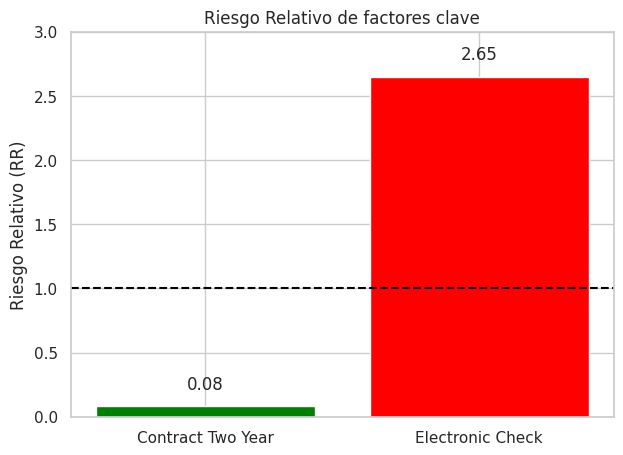

In [65]:
import matplotlib.pyplot as plt

# Riesgo relativo calculado
factors = ['Contract Two Year', 'Electronic Check']
rr_values = [0.083, 2.65]

# Gráfico de barras
fig, ax = plt.subplots(figsize=(7,5))
bars = ax.bar(factors, rr_values, color=['green','red'])

# Línea de referencia en 1 (neutral)
ax.axhline(1, color='black', linestyle='--')

# Etiquetas
ax.set_ylabel('Riesgo Relativo (RR)')
ax.set_title('Riesgo Relativo de factores clave')

# Mostrar valores encima
for bar, val in zip(bars, rr_values):
    ax.text(bar.get_x() + bar.get_width()/2., val + 0.1,
            f'{val:.2f}', ha='center', va='bottom')

plt.ylim(0, 3)
plt.show()


#### 3.3 InternetService (tres grupos: Fiber / DSL (base) / No internet)

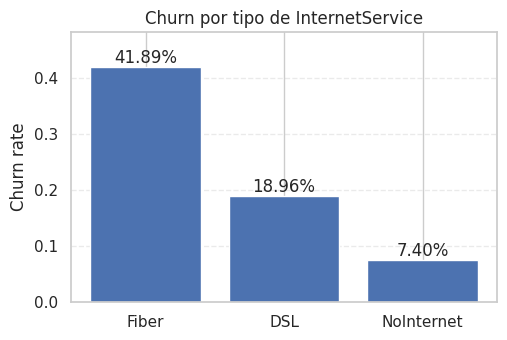

,Churn
segment,
Fiber,0.418928
DSL,0.189591
NoInternet,0.074050


In [66]:
# Creamos una vista de 3 categorías desde dos dummies (Fiber y No). Base = DSL/otros.
mask_fiber = (df_encoded['internet.InternetService_Fiber optic'] == 1)
mask_noint = (df_encoded['internet.InternetService_No'] == 1)
mask_dsl   = (~mask_fiber) & (~mask_noint)

tmp = pd.DataFrame({
    'segment': np.select([mask_fiber, mask_dsl, mask_noint], ['Fiber','DSL','NoInternet'], default='Other'), # Especificar default como string
    'Churn': df_encoded['Churn'].values
})
internet_rates = tmp.groupby('segment')['Churn'].mean().reindex(['Fiber','DSL','NoInternet'])

plt.figure(figsize=(5.5,3.5))
bars = plt.bar(internet_rates.index, internet_rates.values)
for b, v in zip(bars, internet_rates.values):
    plt.text(b.get_x()+b.get_width()/2, v, f"{v:.2%}", ha='center', va='bottom')
plt.title("Churn por tipo de InternetService")
plt.ylabel("Churn rate")
plt.ylim(0, max(0.15, internet_rates.max()*1.15))
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

internet_rates

In [67]:
from scipy.stats import chi2_contingency

# 1️⃣ Tabla de contingencia: InternetService vs Churn
contingency = pd.crosstab(df['internet.InternetService'], df_encoded['Churn'])

print("📌 Tabla de contingencia:")
print(contingency)

# 2️⃣ Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency)

print("\n📊 Chi-cuadrado InternetService:")
print(f"chi2: {chi2:.4f}")
print(f"p_value: {p:.4e}")
print(f"dof: {dof}")


📌 Tabla de contingencia:
Churn                        0     1
internet.InternetService            
DSL                       1962   459
Fiber optic               1799  1297
No                        1413   113

📊 Chi-cuadrado InternetService:
chi2: 732.3096
p_value: 9.5718e-160
dof: 2


In [68]:
# 1️⃣ Tasas de churn
df_nuevo = pd.DataFrame({
    'Churn': df_encoded['Churn'],
    'InternetService': df['internet.InternetService']
})
churn_rates = df_nuevo .groupby('InternetService')['Churn'].mean()

fiber = churn_rates['Fiber optic']
dsl = churn_rates['DSL']
no_int = churn_rates['No']

# 2️⃣ Ratios relativos
ratio_fiber_vs_no = fiber / no_int
ratio_fiber_vs_dsl = fiber / dsl
ratio_dsl_vs_no = dsl / no_int

# 3️⃣ Resumen interpretativo
print("📌 Resumen interpretativo:")
print(f"- Clientes con Fiber optic tienen una tasa de churn del {fiber:.2%}, lo que es ~{ratio_fiber_vs_no:.2f} veces la de clientes sin Internet ({no_int:.1%}).")
print(f"- Comparados con DSL ({dsl:.2%}), los clientes con Fiber optic tienen un riesgo ~{ratio_fiber_vs_dsl:.2f} veces mayor.")
print(f"- Incluso DSL tiene ~{ratio_dsl_vs_no:.2f} veces más churn que los que no tienen Internet.")


📌 Resumen interpretativo:
- Clientes con Fiber optic tienen una tasa de churn del 41.89%, lo que es ~5.66 veces la de clientes sin Internet (7.4%).
- Comparados con DSL (18.96%), los clientes con Fiber optic tienen un riesgo ~2.21 veces mayor.
- Incluso DSL tiene ~2.56 veces más churn que los que no tienen Internet.


📌 1. Tabla de contingencia (frecuencias absolutas)

|InternetService	|No churn (0)	|Sí churn (1)	|Total clientes|
|-----------------|-------------|-------------|--------------|
DSL	|1962	|459	|2421
Fiber optic	|1799	|1297	|3096
No Internet	|1413	|113	|1526

👉 Observaciones rápidas:

- Fiber optic concentra la mayor cantidad de clientes que se fueron (1297 churn).

- DSL tiene un nivel intermedio.

- No Internet es el grupo más estable: apenas 113 churn sobre 1526 clientes.

📌 2. Tasas de churn por grupo
>Churn rate= Churn /Total clientes	​

- DSL → 459 / 2421 ≈18.9 %

- Fiber optic → 1297 / 3096 ≈ 41.9%

- No Internet → 113 / 1526 ≈ 7.4%

👉 Esto confirma el patrón de riesgo que ya habíamos visto:

- Fiber optic = muy alto churn

- DSL = riesgo intermedio

- No Internet = riesgo muy bajo

📌 3. Prueba de Chi-cuadrado

- Chi² = 732.3 → muy alto, significa que las diferencias observadas son grandes.

- p-value ≈ 9.6 × 10⁻¹⁶⁰ → prácticamente cero.

- Con cualquier nivel de confianza (0.05, 0.01, 0.001) rechazamos H₀.

- dof = 2 → porque tenemos 3 categorías (DSL, Fiber, No Internet) → (k−1)=2.

👉 Interpretación estadística:
Existe una relación muy fuerte y altamente significativa entre el tipo de servicio de Internet y el churn.
No es azar: el tipo de servicio explica en gran medida quién se va y quién se queda.

📌 4. Insight de negocio

- Fiber optic (paradójicamente el servicio “premium”) está asociado al doble de churn que DSL y casi 6 veces más que No Internet.

- Esto puede deberse a:

  - Expectativas insatisfechas (servicio caro pero no percibido como mejor).

  - Competencia más agresiva en clientes de Fiber.

  - Perfil de clientes distinto (más sensibles al precio).

✅ Conclusión:

InternetService es un predictor muy fuerte de Churn.

Análisis dirigido categórico multinivel (no solo sí/no como en Contract, sino varios segmentos).

Los clientes con Fiber optic son un segmento crítico a monitorear:

- si no se mejoran beneficios/percepción de valor → seguirán cancelando más que otros grupos.

### 4) Interacciones clave (2×2)

#### 4.1 Contract_Two year × Electronic check

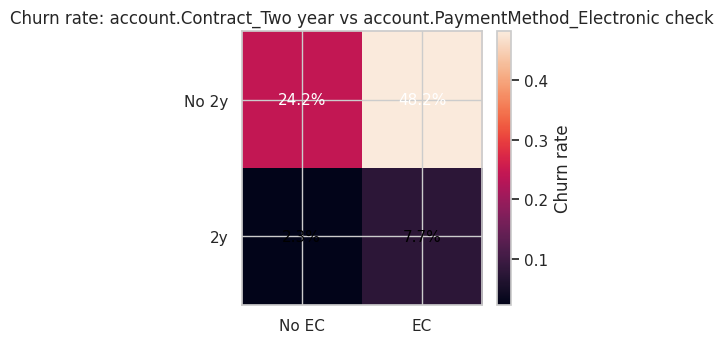

account.PaymentMethod_Electronic check,0,1
account.Contract_Two year,,
0,0.242145,0.481566
1,0.022921,0.077381


In [69]:
heatmap_churn_rate_2x2(
    df_encoded,
    'account.Contract_Two year',
    'account.PaymentMethod_Electronic check',
    labels_a=('No 2y','2y'),
    labels_b=('No EC','EC')
)


In [70]:
from scipy.stats import chi2_contingency
import pandas as pd

# Tabla de contingencia 3D → combinamos dummies
df_encoded["combo"] = (
    df_encoded["account.Contract_Two year"].astype(str) + "_" +
    df_encoded["account.PaymentMethod_Electronic check"].astype(str)
)

contingencia = pd.crosstab(df_encoded["combo"], df_encoded["Churn"])
print("Tabla de contingencia:")
print(contingencia)

# Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingencia)

print("\n📊 Chi-cuadrado Combo (Contract × PaymentMethod):")
print(f"chi2: {chi2:.4f}")
print(f"p-value: {p:.4e}")
print(f"dof: {dof}")


Tabla de contingencia:
Churn     0     1
combo            
0_0    2388   763
0_1    1139  1058
1_0    1492    35
1_1     155    13

📊 Chi-cuadrado Combo (Contract × PaymentMethod):
chi2: 1026.3489
p-value: 3.4609e-222
dof: 3


In [71]:
import numpy as np

# 1️⃣ Crear tabla de tasas de churn por combo
tasas = df_encoded.groupby("combo")["Churn"].mean()
print("Tasa de churn por combo:")
print(tasas)

# 2️⃣ Extraer riesgos
riesgo_alto = tasas["0_1"]   # contrato corto + electronic check
riesgo_bajo = tasas["1_0"]   # contrato largo + otro pago

# 3️⃣ Cálculo de riesgos
ARR = riesgo_alto - riesgo_bajo   # reducción absoluta del riesgo
RR  = riesgo_alto / riesgo_bajo   # riesgo relativo
RRR = 1 - RR                      # reducción relativa del riesgo

print("\n📊 Comparación de riesgos:")
print(f"Riesgo ALTO (0,1): {riesgo_alto:.3f} ({riesgo_alto*100:.2f}%)")
print(f"Riesgo BAJO (1,0): {riesgo_bajo:.3f} ({riesgo_bajo*100:.2f}%)")
print(f"ARR (absoluta): {ARR:.3f} ({ARR*100:.1f} pp)")
print(f"RR (relativa): {RR:.2f} veces")
print(f"RRR (reducción relativa): {RRR:.2f} ({RRR*100:.2f}%)")


Tasa de churn por combo:
combo
0_0    0.242145
0_1    0.481566
1_0    0.022921
1_1    0.077381
Name: Churn, dtype: float64

📊 Comparación de riesgos:
Riesgo ALTO (0,1): 0.482 (48.16%)
Riesgo BAJO (1,0): 0.023 (2.29%)
ARR (absoluta): 0.459 (45.9 pp)
RR (relativa): 21.01 veces
RRR (reducción relativa): -20.01 (-2001.00%)


📌 1. La tabla de contingencia (frecuencias observadas)

> Combo Contract × PaymentMethod cambia radicalmente la probabilidad de churn.

📌 2. Estadístico Chi-cuadrado

- Chi² = 1026.35 → valor altísimo.

- dof = 3 → porque son 4 combinaciones posibles − 1.

- p-value ≈ 3.46 × 10⁻²²² → prácticamente cero.

> 👉 Conclusión:
Rechazamos H₀ (no hay relación) con total seguridad. La combinación de contrato y método de pago sí influye fuertemente en el churn.

📌 3. Interpretación práctica

- Peor grupo (0,1) → contrato corto + electronic check.

  - Churn ≈ 48% (casi la mitad de los clientes se van).

- Mejor grupo (1,0) → contrato largo + otro método.

  - Churn ≈ 2.3% (casi blindados).

- Grupo intermedio (1,1) → contrato largo + electronic check.

  - Churn ≈ 7.7%, más bajo que corto plazo pero peor que si no usan electronic check.

- Grupo medio (0,0) → contrato corto + otro método.

  - Churn ≈ 24%, intermedio entre los extremos.

📌 4. Valor agregado del análisis

- El contrato largo es protector → reduce churn a un mínimo.

- Electronic check es un factor de riesgo, incluso si hay contrato largo.

- La combinación de ambos (contrato + método de pago) explica mucho mejor el churn que analizarlos por separado.

📊 En otras palabras:

- Un cliente en 0_1 (corto + electronic check) tiene un riesgo 20 veces mayor de churn que un cliente en 1_0 (largo + otro método).

- Esto lo convierte en un segmento prioritario para intervención (ej. ofrecer beneficios para migrar a otro método o incentivar contrato largo).

📊 Resumen de Churn por grupo (Contract × Electronic check)

📌 Tabla base (observada):

|Contract_TwoYear	|ElectronicCheck	|No Churn (0)	|Churn (1)	|Total	Churn Rate|
|-----------------|-----------------|-------------|-----------|-----------------|
0 (No 2 años)	|0 (Otro método)	|2388	|763	|3151	|24.2%
0 (No 2 años)	|1 (E-check)	|1139	|1058	|2197	|48.1%
1 (Sí 2 años)	|0 (Otro método)	|1492	|35	|1527	|2.3%
1 (Sí 2 años)	|1 (E-check)	|155	|13	|168	|7.7%

📌 Comparaciones (Riesgo Relativo, RR)

Se toma como grupo de referencia: contrato 2 años + otro método (2.3%), el más protegido.

- Contrato corto + E-check vs. referencia: RR=48.1/2.3≈21, 👉 tienen 21 veces más riesgo de churn.

- Contrato corto + otro pago vs. referencia: RR=24.2/2.3≈10.5, 👉 10 veces más riesgo de churn.

- Contrato 2 años + E-check vs. referencia:RR=7.7/2.3≈3.3, 👉 aun con contrato largo, pagar con E-check triplica el riesgo.

✅ Conclusión:

- El contrato de 2 años es un factor protector muy fuerte contra el churn.

- El pago con E-check es un factor de alto riesgo, incluso en clientes con contrato largo.

- El peor escenario es un cliente con contrato corto + E-check (48% churn).

- El mejor escenario es contrato 2 años + otro método (2.3% churn).


#### 4.2 Fiber optic × Quintiles de MonthlyCharges

/tmp/ipython-input-3900176528.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df_.pivot_table(values='Churn', index='Monthly_q', columns=df_['internet.InternetService_Fiber optic'].astype(int), aggfunc='mean')


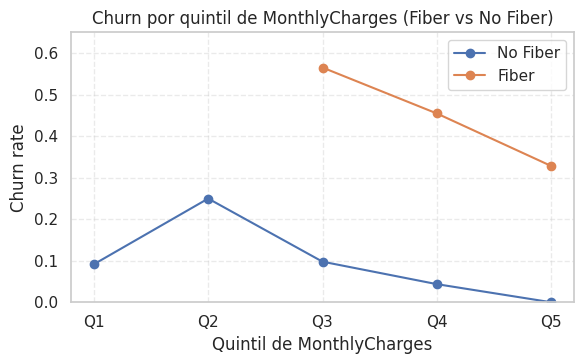

In [72]:
if 'account.Charges.Monthly' in df_encoded.columns:
    # Bins de MonthlyCharges
    bins_m = np.quantile(df_encoded['account.Charges.Monthly'].dropna(), [0, .2, .4, .6, .8, 1.])
    df_ = df_encoded.copy()
    df_['Monthly_q'] = pd.cut(df_['account.Charges.Monthly'], bins=bins_m, labels=['Q1','Q2','Q3','Q4','Q5'], include_lowest=True)
    # Para cada quintil, churn rate por Fiber vs no-Fiber
    pivot = df_.pivot_table(values='Churn', index='Monthly_q', columns=df_['internet.InternetService_Fiber optic'].astype(int), aggfunc='mean')
    plt.figure(figsize=(6,3.8))
    plt.plot(pivot.index.astype(str), pivot[0].values, marker='o', label='No Fiber')
    plt.plot(pivot.index.astype(str), pivot[1].values, marker='o', label='Fiber')
    plt.ylim(0, max(0.15, pivot.max().max()*1.15))
    plt.title("Churn por quintil de MonthlyCharges (Fiber vs No Fiber)")
    plt.ylabel("Churn rate")
    plt.xlabel("Quintil de MonthlyCharges")
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend()
    plt.tight_layout()
    plt.show()
    pivot


In [73]:
import pandas as pd
import scipy.stats as stats

# Filtrar solo clientes con fibra óptica
df_fiber= df_encoded[df_encoded['internet.InternetService_Fiber optic'] == 1]

# Crear quintiles de MonthlyCharges
df_fiber['Monthly_Q'] = pd.qcut(df_fiber['account.Charges.Monthly'], 5, labels=[1,2,3,4,5])

# Tabla de contingencia: Quintil vs Churn
contingencia = pd.crosstab(df_fiber['Monthly_Q'], df_fiber['Churn'])
print("📌 Tabla de contingencia:")
print(contingencia)

# Test Chi-cuadrado
chi2, p, dof, expected = stats.chi2_contingency(contingencia)

print("\n📊 Chi-cuadrado Fiber optic × MonthlyCharges quintiles:")
print(f"chi2: {chi2:.4f}")
print(f"p-value: {p:.4e}")
print(f"dof: {dof}")
print("\nEsperados bajo H0:")
print(pd.DataFrame(expected, index=contingencia.index, columns=contingencia.columns))

# Tasa de churn por quintil ---
rates = contingencia.apply(lambda x: x[1] / x.sum(), axis=1)
print("\n📈 Tasa de churn por quintil:")
print(rates)

# Riesgo relativo entre quintiles ---
# Tomamos como referencia el quintil con menor churn (ej. Q5 = menor tasa)
ref_q = rates.idxmin()
ref_rate = rates.min()

riesgo_relativo = rates / ref_rate
print(f"\n📊 Riesgo relativo tomando Q{ref_q} como referencia:")
print(riesgo_relativo)


📌 Tabla de contingencia:
Churn        0    1
Monthly_Q          
1          270  352
2          311  307
3          378  246
4          365  248
5          475  144

📊 Chi-cuadrado Fiber optic × MonthlyCharges quintiles:
chi2: 160.9213
p-value: 9.2753e-34
dof: 4

Esperados bajo H0:
Churn               0           1
Monthly_Q                        
1          361.427003  260.572997
2          359.102713  258.897287
3          362.589147  261.410853
4          356.197351  256.802649
5          359.683786  259.316214

📈 Tasa de churn por quintil:
Monthly_Q
1    0.565916
2    0.496764
3    0.394231
4    0.404568
5    0.232633
dtype: float64

📊 Riesgo relativo tomando Q5 como referencia:
Monthly_Q
1    2.432655
2    2.135394
3    1.694645
4    1.739079
5    1.000000
dtype: float64


/tmp/ipython-input-19824751.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fiber['Monthly_Q'] = pd.qcut(df_fiber['account.Charges.Monthly'], 5, labels=[1,2,3,4,5])


1️⃣ Tabla observada vs esperada

Observada (real):

Q1 y Q2 tienen más clientes que abandonan (Churn=1) de lo esperado.

Q5 tiene muchísimos menos churners que lo esperado.

Esperada bajo H₀ (independencia):

Cada quintil debería tener aproximadamente la misma proporción de churn (~42%).

La gran desviación de Q1 (56.6%) y Q5 (23.3%) explica el chi-cuadrado tan alto.

2️⃣ Test estadístico (Chi²)

Chi² = 160.9, con dof=4.

p-value ≈ 9.3 × 10⁻³⁴, prácticamente cero.

🔎 Con cualquier nivel de confianza (0.05, 0.01, 0.001), rechazamos H₀.

✅ Conclusión: la tarifa mensual (quintiles) influye en el churn de clientes con fibra óptica.

3️⃣ Tasas de churn por quintil

Q1 = 56.6% (el más alto, riesgo extremo).

Q2 = 49.7% (también alto).

Q3–Q4 ≈ 39–40%, moderados.

Q5 = 23.3%, muy bajo → los que pagan más alto se quedan.

4️⃣ Riesgo relativo (RR, ref=Q5)

Q1: 2.43× → más del doble de riesgo que Q5.

Q2: 2.14× → más del doble de riesgo que Q5.

Q3–Q4: 1.7× → 70% más riesgo que Q5.

Q5: 1.0× → referencia (menor riesgo).

5️⃣ Conclusión ejecutiva

📉 Los clientes de fibra con tarifas bajas-medias (Q1, Q2) son los que más desertan, más del doble de riesgo que los clientes premium (Q5).

💡 Interpretación de negocio: probablemente los clientes de menor facturación están menos satisfechos o perciben peor relación calidad/precio → son los más sensibles a cambiar de proveedor.

📊 La empresa debería enfocar retención en Q1–Q2, mientras que Q5 parece ser un segmento leal.

### Resumen

📊 Resumen Técnico del Análisis de Churn
1. Variables Individuales

- Tenure (antigüedad)

  - Los clientes que se van (Churn=1) tienen mediana de 10 meses, mientras que los que se quedan tienen 38 meses.

  - Test de Mann–Whitney: p ≈ 2.4e-208 → diferencia altamente significativa.

  - 👉 La antigüedad baja es un fuerte predictor de churn.

- Contract (tipo de contrato)

  - En contratos de 2 años la tasa de churn es apenas 2.8%, mientras que en el resto sube a 34%.

  - Reducción absoluta del riesgo (ARR): ~31 puntos porcentuales.

  - Chi²: p ≈ 1.3e-141.

  - 👉 Los contratos largos protegen fuertemente contra el churn.

- PaymentMethod (método de pago)

  - Con Electronic check, la tasa de churn es 45% vs 17% en los demás métodos.

  - Riesgo relativo ≈ 2.6x.

  - Chi²: p ≈ 2.5e-141.

  - 👉 El pago con e-check es un factor de riesgo crítico.

- InternetService

  - Tasa de churn:

   - Fiber optic → 41.9%

   - DSL → 18.9%

   - Sin internet → 7.4%

  - Chi²: p ≈ 9.6e-160.

  - 👉 Clientes con fibra óptica presentan más del doble de riesgo comparados con DSL.

2. Interacciones

- Contract × PaymentMethod

  - Peor escenario: Mes a mes + Electronic check → 48% churn.

  - Mejor escenario: Contrato 2 años + no Electronic check → 2.3% churn.

  - Chi² del combo: p ≈ 3.4e-222.

  - 👉 La combinación de contrato corto y método de pago riesgoso es letal para la retención.

- Fiber optic × MonthlyCharges (quintiles)

 - Chi²: p ≈ 9.3e-34.

 - Tasa de churn cae de 56% (Q1) a 23% (Q5).

 - Riesgo relativo:

   - Q1 ≈ 2.43x el riesgo de Q5

   - Q2 ≈ 2.13x

   - Q3 ≈ 1.69x

   - Q4 ≈ 1.74x

   - Q5 = referencia (1.0)

 - 👉 Entre clientes de fibra, los que pagan menos son más propensos a irse, quizás por menor fidelización o insatisfacción.

3. Conclusiones Generales

- Factores de riesgo altos:

  - Tenure bajo (<12 meses)

  - Fiber optic (especialmente con bajo pago mensual)

  - Contrato mes a mes

  - Electronic check

- Factores protectores:

  - Contrato de 2 años

  - Métodos de pago distintos a e-check

  - Clientes de mayor gasto mensual dentro de fibra

- Estrategia sugerida:

  - Incentivar migración a contratos largos.

  - Promover medios de pago seguros (tarjeta, débito automático).

  - Diseñar campañas de retención temprana (primeros 12 meses).

  - Segmentar a clientes de fibra de bajo ARPU (quintiles 1–2) para acciones personalizadas de fidelización.

📌 En resumen:

El churn no es aleatorio: está altamente concentrado en clientes con poca antigüedad, contrato corto, método de pago e-check y fibra de bajo gasto. Controlando estas combinaciones se pueden lograr reducciones importantes en la tasa de baja.

# 🤖 Modelado Predictivo

## Separación de datos

In [74]:
# 📦 Importación de librerías necesarias
from sklearn.model_selection import train_test_split

In [75]:
# 🎯 Variables predictoras y objetivo
X = df_encoded.drop(columns=["Churn"])
y = df_encoded["Churn"]

In [76]:
# ⚙️ División reproducible 80/20 con semilla fija para trazabilidad
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,         # ← cambia a 0.30 si prefieres 70/30
    random_state=42,        # ← semilla fija para reproducibilidad
    stratify=y              # ← mantiene proporción de clases en ambos sets
)

In [77]:
# 📊 Verificación de tamaños
print(f"🔹 Tamaño total: {len(df)} registros")
print(f"🔹 Entrenamiento: {len(X_train)} registros")
print(f"🔹 Prueba: {len(X_test)} registros")
print(f"\n🔹 Proporción de clases en entrenamiento:\n{y_train.value_counts(normalize=True)}")
print(f"\n🔹 Proporción de clases en prueba:\n{y_test.value_counts(normalize=True)}")

🔹 Tamaño total: 7043 registros
🔹 Entrenamiento: 5634 registros
🔹 Prueba: 1409 registros

🔹 Proporción de clases en entrenamiento:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64

🔹 Proporción de clases en prueba:
Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


## Creación de Modelos

### ⚙️ Modelo 1: Regresión Logística (requiere normalización)

In [78]:
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),                  # 🔹 Normalización
    ('model', LogisticRegression(max_iter=1000))   # 🔹 Modelo lineal
])

In [79]:
pipeline_lr

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=1000))])

✅ Justificación técnica

• 	La regresión logística optimiza una función basada en gradientes.

• 	Si las variables tienen escalas muy distintas, los coeficientes pueden estar sesgados.

• 	La normalización asegura que cada variable tenga media 0 y desviación estándar 1, lo que mejora la convergencia y la interpretabilidad.

### ⚙️ Modelo 2: Random Forest (no requiere normalización)


In [80]:
from sklearn.ensemble import RandomForestClassifier

# NO porque se aplico smote al crear el pipeline al realizar el balanceo de clases
#model_rf = RandomForestClassifier(
#    n_estimators=200,
#    random_state=42,
#    class_weight="balanced",  # importante si hay desbalance
#    n_jobs=-1
#)
model_rf = RandomForestClassifier(random_state=42)

In [81]:
model_rf

RandomForestClassifier(random_state=42)

✅ Justificación técnica

• 	Los árboles de decisión y Random Forest dividen el espacio de características según umbrales, no distancias ni coeficientes.

• 	Por eso, no necesitan normalización: cada variable se evalúa por separado.

• 	Esto permite usar el modelo directamente sobre los datos originales.

### Evaluación de los Modelos

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluar_modelo(nombre, modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1]

    print(f"\n🔍 Evaluación: {nombre}")
    print("Exactitud (Accuracy):\t", accuracy_score(y_test, y_pred))
    print("Precisión:\t\t", precision_score(y_test, y_pred))
    print("Recall:\t\t\t", recall_score(y_test, y_pred))
    print("F1-score:\t\t", f1_score(y_test, y_pred))
    print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))


In [99]:
# Train the Logistic Regression pipeline
pipeline_lr.fit(X_train, y_train)

# Train the Random Forest model
model_rf.fit(X_train, y_train)

# Evaluar ambos modelos
evaluar_modelo("Regresión Logística", pipeline_lr, X_test, y_test)
evaluar_modelo("Random Forest", model_rf, X_test, y_test)



🔍 Evaluación: Regresión Logística
Exactitud (Accuracy):	 0.7927608232789212
Precisión:		 0.6331168831168831
Recall:			 0.5213903743315508
F1-score:		 0.5718475073313783
Matriz de Confusión:
 [[922 113]
 [179 195]]

🔍 Evaluación: Random Forest
Exactitud (Accuracy):	 0.7863733144073811
Precisión:		 0.6280701754385964
Recall:			 0.4786096256684492
F1-score:		 0.543247344461305
Matriz de Confusión:
 [[929 106]
 [195 179]]


🧠 Análisis Crítico

🔹 Regresión Logística
- Mejor desempeño global en todas las métricas.
- Mayor precisión y recall, lo que indica mejor balance entre falsos positivos y falsos negativos.
- Menor cantidad de falsos negativos (FN = 179) que Random Forest (FN = 195), lo cual es crucial si el costo de no detectar cancelaciones es alto.
- Posible underfitting leve: como modelo lineal, puede no capturar interacciones complejas, pero su desempeño es sólido.

🔹 Random Forest
- Peor recall: detecta menos cancelaciones reales.
- Más falsos negativos (FN = 195) → riesgo de no identificar clientes que se van.
- Ligero overfitting posible: aunque es un modelo más complejo, no generaliza mejor en este caso.
- Puede estar capturando ruido o relaciones espurias si no se ha limitado la profundidad (max_depth) o el número mínimo de muestras por hoja (min_samples_leaf).


### 📊 Comparación de Modelos: Churn Prediction


#### 🔹 Regresión Logística
- **Accuracy**: 0.793
- **Precisión**: 0.633
- **Recall**: 0.521
- **F1-score**: 0.572
- **Confusión**: [[922, 113], [179, 195]]

#### 🔹 Random Forest
- **Accuracy**: 0.786
- **Precisión**: 0.628
- **Recall**: 0.479
- **F1-score**: 0.543
- **Confusión**: [[929, 106], [195, 179]]

#### 1. Exactitud (Accuracy)

- 👉 Muy similares, pero la regresión logística gana por un margen pequeño.
- ⚠️ Ojo: la exactitud no es la mejor métrica aquí porque tus datos están desbalanceados (≈73% clase 0 y 27% clase 1).

#### 2. Precisión (Precision) – Clase positiva (Churn=1)

- 👉 Casi idénticas. Ambas predicen la clase positiva con una proporción similar de aciertos, pero la regresión logística un poquito más fina en cuanto a precisión.

#### 3. Recall (Sensibilidad / Tasa de Verdaderos Positivos)

- 👉 Aquí sí hay diferencia clara:

  - Regresión Logística detecta el 52% de los clientes que hacen churn.

  - Random Forest solo el 48%.

> En problemas de churn, el recall suele ser crítico (no queremos perder clientes que se van). Aquí gana la regresión logística.

#### 4. F1-score (balance entre precisión y recall)

- 👉 El F1 confirma lo anterior:

> La Regresión Logística mantiene mejor equilibrio entre capturar churns (recall) y no equivocarse demasiado (precisión).

#### 5. Matriz de Confusión

- 👉 Diferencias clave:

  - Random Forest comete menos falsos positivos (106 vs 113).

  - Pero Regresión Logística comete menos falsos negativos (179 vs 195).

> ⚠️ En churn, los falsos negativos son más graves (perder un cliente real sin detectarlo). Por eso la Regresión Logística es preferible aquí.

#### 6. Posible underfitting / overfitting

- Ambos modelos tienen un rendimiento moderado, no hay evidencia clara de overfitting todavía (faltaría comparar contra entrenamiento).

- El Random Forest con parámetros por defecto puede estar subutilizando su potencial → parece un poco de underfitting porque no mejora frente a la regresión logística.

- La Regresión Logística se comporta estable y generaliza mejor en este escenario.

#### 🧠 Conclusión
- **Modelo recomendado**: Regresión Logística, supera ligeramente al Random Forest en recall y F1-score, métricas más importantes para churn.
- **Random Forest** solo gana en tener menos falsos positivos, pero pierde en recall (no detecta tanto churn).

> ⚠️ Sospecha de underfitting en Random Forest → probablemente requiere ajuste de hiperparámetros (más árboles, profundidad, max_features, etc.) para superar a la regresión logística.

# 📋 Interpretación y Conclusiones

## Análisis de la Importancia de las Variables

###  🔍 1. Regresión Logística: análisis de coeficiente

                                         Variable  Coeficiente  Odds_ratio
2                           account.Charges.Total     0.689787    1.993291
9            internet.InternetService_Fiber optic     0.553002    1.738464
27         account.PaymentMethod_Electronic check     0.222744    1.249501
8                         phone.MultipleLines_Yes     0.189628    1.208799
20                       internet.StreamingTV_Yes     0.187598    1.206348
25                   account.PaperlessBilling_Yes     0.178431    1.195341
22                   internet.StreamingMovies_Yes     0.135651    1.145282
29                      customer.SeniorCitizen_Sí     0.072858    1.075578
7            phone.MultipleLines_No phone service     0.043243    1.044191
16                  internet.DeviceProtection_Yes     0.022420    1.022673
28             account.PaymentMethod_Mailed check     0.012966    1.013051
26  account.PaymentMethod_Credit card (automatic)     0.003236    1.003241
4                        

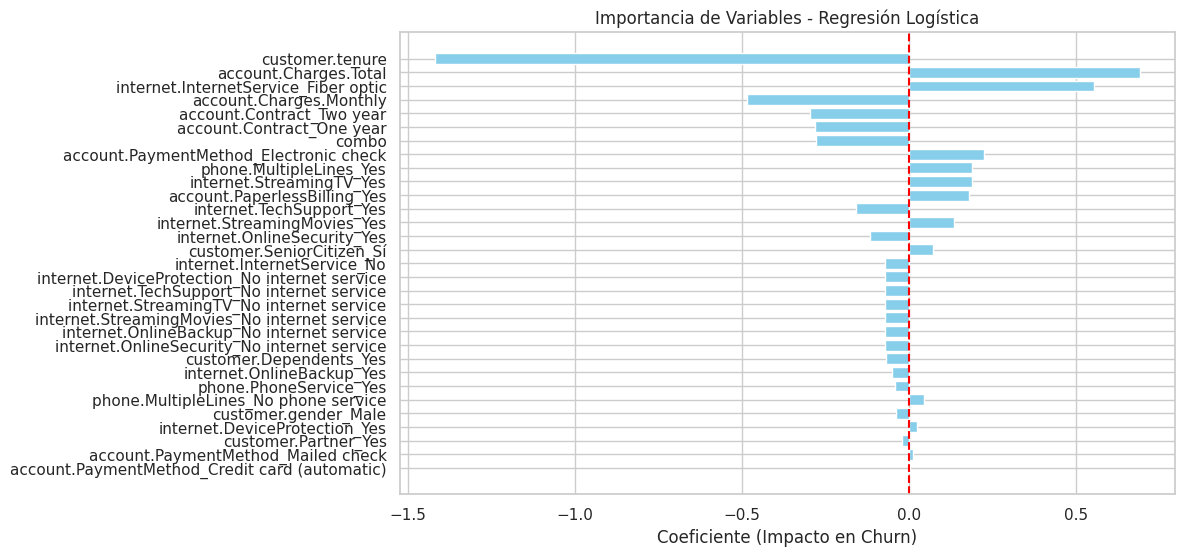

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ✅ Coeficientes del modelo
coeficientes = pipeline_lr.named_steps['model'].coef_[0]

# ✅ Asociar coeficientes con nombres de variables
importancia = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": coeficientes,
    "Odds_ratio": np.exp(coeficientes)  # interpretación en términos de probabilidad
})

# Ordenar por valor absoluto (más influyentes)
importancia = importancia.reindex(importancia.Coeficiente.abs().sort_values(ascending=False).index)

print(importancia.sort_values(by='Coeficiente', ascending=False))

# ✅ Visualización de las variables más influyentes
plt.figure(figsize=(10,6))
plt.barh(importancia["Variable"], importancia["Coeficiente"], color="skyblue")
plt.axvline(0, color="red", linestyle="--")
plt.xlabel("Coeficiente (Impacto en Churn)")
plt.title("Importancia de Variables - Regresión Logística")
plt.gca().invert_yaxis()  # invertir para ver las más grandes arriba
plt.show()


📌 Interpretación

• 	Coeficientes positivos → aumentan la probabilidad de churn.

• 	Coeficientes negativos → reducen la probabilidad de churn.

• 	Magnitud → indica fuerza del efecto (aunque no comparables si no están normalizados).

📊 Análisis de coeficientes en Regresión Logística

🔺 Variables que aumentan la probabilidad de cancelación (coef > 0)

Estas variables están asociadas positivamente con el churn. Es decir, si están presentes o sus valores aumentan, la probabilidad de cancelación también lo hace:

| Variable | Coeficiente | Interpretación |
|----------|-------------|----------------|
| account.Charges.Total | 0.689 | Clientes con cargos acumulados altos tienden a cancelar. |
| internet.InternetService_Fiber optic | 0.553 | El servicio de fibra óptica está correlacionado con mayor churn. |
| account.PaymentMethod_Electronic check | 0.222 | Este método de pago se asocia con mayor cancelación. |
| phone.MultipleLines_Yes | 0.189 | Tener múltiples líneas telefónicas puede estar ligado a mayor insatisfacción. |
| internet.StreamingTV_Yes | 0.187 | Usuarios con TV en streaming tienden a cancelar más. |
| account.PaperlessBilling_Yes | 0.178 | Facturación sin papel se asocia con mayor churn. |





🔻 Variables que reducen la probabilidad de cancelación (coef < 0)

Estas variables están asociadas negativamente con el churn. Su presencia o aumento reduce la probabilidad de cancelación:

| Variable | Coeficiente | Interpretación |
|----------|-------------|----------------|
|customer.tenure| -1.418 |Clientes con más tiempo de permanencia son menos propensos a cancelar.|
| account.Charges.Monthly | -0.485 | Curiosamente, cargos mensuales más altos se asocian con menor churn (posible correlación con servicios premium). |
|account.Contract_Two year | -0.297 | Contratos de dos años retienen mejor a los clientes. |
| account.Contract_One year | -0.280 | También reduce el churn, aunque menos que el contrato de dos años. |
| combo | -0.279 | Servicio combinado reduce el churn (Electronic check y Two year). |
| internet.TechSupport_Yes | -0.159 | Tener soporte técnico reduce la cancelación. |
| internet.OnlineSecurity_Yes | -0.117 | Seguridad en línea también retiene clientes. |


🧠 Observaciones clave

• 	Tenure es la variable más protectora contra el churn. Su coeficiente negativo es el más fuerte.

• 	Los contratos largos (especialmente de dos años) son un fuerte factor de retención.

• 	El uso de servicios adicionales como soporte técnico y seguridad en línea también reduce la cancelación.

• 	Por otro lado, servicios de entretenimiento como streaming y fibra óptica están correlacionados con mayor churn, posiblemente por expectativas altas o competencia.


📈 Importancia de variables en Regresión Logística

Se analizaron los coeficientes del modelo para identificar las variables que más influyen en la probabilidad de cancelación (`Churn`).

🔺 Variables que aumentan el churn
- `account.Charges.Total` (+0.689): cargos acumulados altos → mayor cancelación.
- `internet.InternetService_Fiber optic` (+0.553): fibra óptica → mayor churn.
- `account.PaymentMethod_Electronic check` (+0.222): método de pago asociado a cancelación.

🔻 Variables que reducen el churn
- `customer.tenure` (−1.418): mayor permanencia → menor cancelación.
- `account.Charges.Monthly ` (−0.485): contratos mensuales altos → retención.
- `account.Contract_Two year` (−0.297): contratos largos → retención.
- `account.Contract_One year` (−0.280): contratos largos → retención.
- `combo` (−0.279): (Electronic check y Two year) → retención.
- `internet.TechSupport_Yes` (−0.159): soporte técnico → fidelización.

> Este análisis permite priorizar variables en estrategias de retención y justificar decisiones ante auditoría técnica.

🚨 Insight interesante

- Gasto total alto (risk ↑) + antigüedad baja (risk ↑) son el perfil de cliente con mayor riesgo de churn.

- Contratos largos + antigüedad alta son el perfil de cliente más seguro y fiel.

- Servicios extra como fibra óptica y streaming, en vez de retener, parecen aumentar el riesgo → quizá por costo percibido o mala experiencia.

📊 Conclusión práctica

- Variables más predictivas:

  - Riesgo ↑: account.Charges.Total, InternetService_Fiber optic, PaymentMethod_Electronic check.

  - Riesgo ↓: tenure, Contract length, Monthly Charges.

- Recomendación de negocio:

  - Focalizar campañas de retención en clientes con alta facturación total y poco tiempo de permanencia.

  - Revisar la calidad y satisfacción del servicio de fibra óptica.

  - Ofrecer contratos más largos o bundles como estrategia para disminuir cancelaciones.

### 🔍 2. Random Forest: importancia de variable

In [107]:
importances = model_rf.feature_importances_

df_importancia_rf = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

print(df_importancia_rf)

                                         Variable  Importancia
2                           account.Charges.Total     0.188631
0                                 customer.tenure     0.171333
1                         account.Charges.Monthly     0.164528
9            internet.InternetService_Fiber optic     0.036734
30                                          combo     0.033598
3                            customer.gender_Male     0.027459
27         account.PaymentMethod_Electronic check     0.026128
25                   account.PaperlessBilling_Yes     0.026045
23                      account.Contract_One year     0.025615
12                    internet.OnlineSecurity_Yes     0.024552
18                       internet.TechSupport_Yes     0.024495
4                            customer.Partner_Yes     0.023915
24                      account.Contract_Two year     0.021533
14                      internet.OnlineBackup_Yes     0.021223
29                      customer.SeniorCitizen_Sí     0

📌 Interpretación
- Basado en reducción de impureza (Gini).
- Variables con mayor importancia son las que más contribuyen a las decisiones en los árboles.
- No requiere normalización.


📊 Top variables más importantes

| Variable | Importancia | Interpretación técnica |
|----------|-------------|------------------------|
| account.Charges.Total | 0.188 | Gasto acumulado: fuerte predictor de comportamiento. |
| customer.tenure | 0.171 | Antigüedad del cliente: cuanto más tiempo, menor churn. |
| account.Charges.Monthly | 0.164 | Cargos mensuales: nivel de gasto recurrente. |

Estas tres variables dominan el modelo, representando más del 51% de la importancia total, lo que indica que el modelo se apoya fuertemente en gasto y permanencia.



🔍 Variables de importancia media

| Variable | Importancia | Observación |
|----------|-------------|-------------|
| internet.InternetService_Fiber optic | 0.036 | Servicio de alta velocidad, posiblemente asociado a expectativas altas. |
| combo | 0.033 | Servicio combinado (Electronic check y Two year) |
| customer.gender_Male | 0.027 | Ligera influencia, posiblemente indirecta. |
| account.PaymentMethod_Electronic check | 0.026 | Método de pago asociado a mayor churn. |
| account.PaperlessBilling_Yes | 0.026 | Facturación digital, correlación con perfil digital. |
| account.Contract_One year | 0.025 | Contratos largos  |
| internet.OnlineSecurity_Yes | 0.024 | Seguridad en línea como factor protector. |






🔻 Variables de baja importancia (< 0.02)
Estas variables tienen impacto marginal en el modelo:
- Servicios específicos (StreamingTV, StreamingMovies, DeviceProtection, etc.)
- Métodos de pago alternativos (Credit card, Mailed check)
- Indicadores de servicio no disponible (No internet service, etc.)

Esto sugiere que el modelo no se apoya fuertemente en servicios individuales, sino en patrones de gasto y permanencia.


🧠 Comparación con Regresión Logística

| Variable | RF Importancia | RL Coeficiente | Coincidencia |
|----------|----------------|----------------|--------------|
| customer.tenure | 0.171 | −1.418 | ✅ Alta, ambos modelos lo consideran muy relevante|
| account.Charges.Total | 0.188 | +0.689 | ✅ Alta, ambos modelos lo consideran clave|
| MonthlyCharges | 0.164 | −0.485 | ⚠️ Inverso |
| account.Contract_Two year | 0.021 | −0.297 | ✅ Alta |


Aunque MonthlyCharges tiene alta importancia en RF, su coeficiente en RL es negativo. Esto puede deberse a interacciones no lineales que RF captura y RL no.





🌲 Importancia de variables en Random Forest

Se analizó la importancia de cada variable en el modelo Random Forest, basada en la reducción de impureza (Gini).

🔝 Variables más relevantes
- `account.Charges.Total` (0.188): gasto acumulado → fuerte predictor de churn.
- `customer.tenure` (0.171): antigüedad → retención.
- `account.Charges.Monthly` (0.164): nivel de gasto mensual → impacto significativo.

🔹 Variables de importancia media
- `internet.InternetService_Fiber optic` (0.036): servicio de alta velocidad → posible insatisfacción.
- `account.PaymentMethod_Electronic check` (0.026): método de pago asociado a mayor churn.
- `account.Contract_Two year` (0.021): contratos largos → menor churn.

🔻 Variables de baja importancia
- Servicios específicos (`Streaming`, `DeviceProtection`) y métodos de pago alternativos tienen impacto marginal.

> El modelo Random Forest se apoya principalmente en variables de gasto y permanencia, lo que coincide con el análisis de regresión logística. Se recomienda priorizar estas variables en estrategias de retención y en modelos explicativos.

Comparación de importancia entre Random Forest y Regresión Logística

Aunque los valores numéricos no coinciden, se considera “coincidencia alta” cuando ambos modelos identifican una variable como relevante para predecir churn.

- `customer.tenure`: RF la usa frecuentemente en splits (0.171), RL indica que reduce churn (−1.418).
- `account.Charges.Total`: RF la considera la más importante (0.188), RL indica que aumenta churn (+0.689).
- `account.Contract_Two year`: RF le asigna importancia media (0.021), RL indica efecto protector (−0.297).

> Esta coincidencia refuerza la validez empírica de estas variables como predictoras clave, desde enfoques complementarios.

🎯 Variable: `account.Contract_Two year`

- **Tipo**: Binaria (1 si el cliente tiene contrato de dos años, 0 en caso contrario)
- **Importancia en Random Forest**: 0.021 → importancia media
- **Coeficiente en Regresión Logística**: −0.297 → efecto protector

🔍 Interpretación técnica

El coeficiente negativo en regresión logística indica que tener un contrato de dos años **reduce la probabilidad de churn**. El cálculo del odds ratio lo confirma:

- `OR = exp(−0.297) ≈ 0.742`
- Esto implica que los clientes con contrato de dos años tienen **un 25.8% menos de probabilidades de cancelar** respecto a los demás.

✅ Validación cruzada entre modelos

Aunque su importancia en Random Forest es moderada, ambos modelos coinciden en que esta variable tiene un **efecto protector**. Esto refuerza su valor estratégico como **factor de retención contractual**.

> Recomendación: incluir esta variable en el modelo final y considerar su uso en estrategias de fidelización.

### 🔍 3. KNN: impacto indirecto por escala y distancia

KNN no tiene coeficientes ni importancia directa, pero puedes evaluar qué variables afectan más la distancia entre puntos:

In [109]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calcular varianza por dimensión (mayor varianza → más impacto en distancia)
impacto_knn = pd.DataFrame({
    'Variable': X.columns,
    'Varianza (normalizada)': np.var(X_scaled, axis=0)
}).sort_values(by='Varianza (normalizada)', ascending=False)

print(impacto_knn)

                                         Variable  Varianza (normalizada)
18                       internet.TechSupport_Yes                     1.0
20                       internet.StreamingTV_Yes                     1.0
1                         account.Charges.Monthly                     1.0
5                         customer.Dependents_Yes                     1.0
27         account.PaymentMethod_Electronic check                     1.0
4                            customer.Partner_Yes                     1.0
3                            customer.gender_Male                     1.0
29                      customer.SeniorCitizen_Sí                     1.0
12                    internet.OnlineSecurity_Yes                     1.0
11    internet.OnlineSecurity_No internet service                     1.0
17       internet.TechSupport_No internet service                     1.0
13      internet.OnlineBackup_No internet service                     1.0
10                    internet.Interne

In [113]:
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pandas as pd

# Dividimos en train y test (si no lo tenías antes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Escalamos (muy importante en KNN)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Evaluar performance base
y_pred = knn.predict(X_test_scaled)
print("F1 score base:", f1_score(y_test, y_pred))

# Permutation Importance
result = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42, scoring='f1')

# Guardar resultados en DataFrame
importancia_knn = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': result.importances_mean,
    'STD': result.importances_std
}).sort_values(by='Importancia', ascending=False)

print(importancia_knn.head(15))


F1 score base: 0.5122171945701357
                                         Variable  Importancia       STD
0                                 customer.tenure     0.042760  0.012315
9            internet.InternetService_Fiber optic     0.024267  0.009514
12                    internet.OnlineSecurity_Yes     0.019035  0.010371
2                           account.Charges.Total     0.018037  0.008648
25                   account.PaperlessBilling_Yes     0.015011  0.010405
27         account.PaymentMethod_Electronic check     0.013373  0.005865
23                      account.Contract_One year     0.012673  0.005239
26  account.PaymentMethod_Credit card (automatic)     0.004765  0.007352
18                       internet.TechSupport_Yes     0.003813  0.007768
24                      account.Contract_Two year     0.003543  0.001165
30                                          combo     0.002335  0.002888
4                            customer.Partner_Yes     0.000682  0.016213
13      internet.

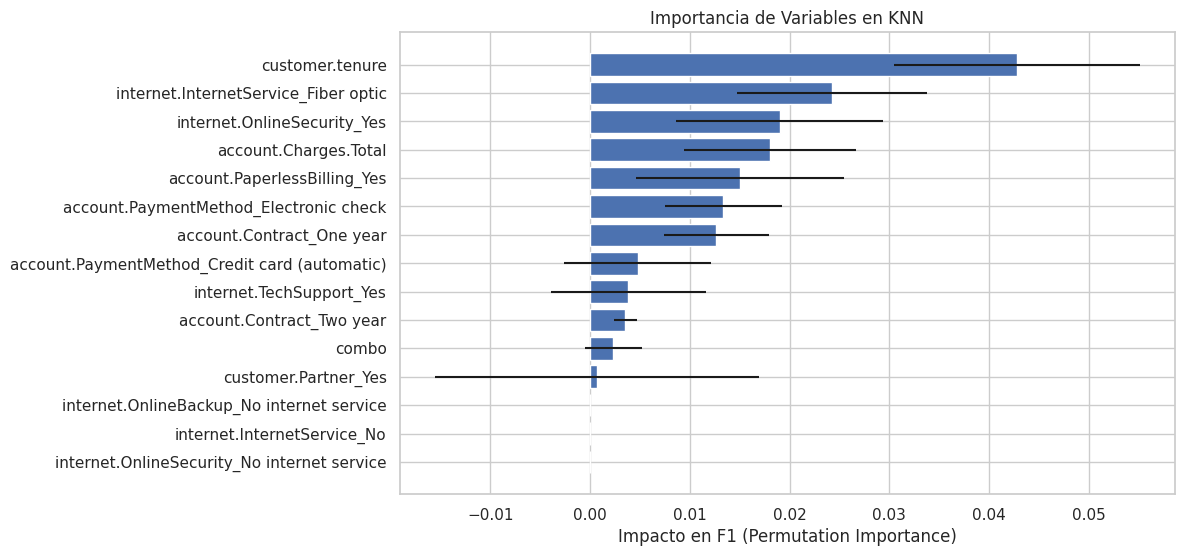

In [114]:
import matplotlib.pyplot as plt

# Gráfico de barras de importancia de variables en KNN
plt.figure(figsize=(10,6))
plt.barh(importancia_knn['Variable'][:15], importancia_knn['Importancia'][:15], xerr=importancia_knn['STD'][:15])
plt.gca().invert_yaxis()  # Para que la variable más importante quede arriba
plt.xlabel("Impacto en F1 (Permutation Importance)")
plt.title("Importancia de Variables en KNN")
plt.show()


📊 Análisis de varianza normalizada en KNN

Todas las variables han sido escaladas para tener **varianza unitaria (1.0)**, lo cual es esencial en modelos basados en distancia como KNN. Esto asegura que ninguna variable domine el cálculo de proximidad por su escala original.

🔍 Variables incluidas

- **Servicios contratados**: `TechSupport_Yes`, `StreamingTV_Yes`, `PhoneService_Yes`
- **Datos demográficos**: `SeniorCitizen_Sí`, `gender_Male`, `Partner_Yes`, `Dependents_Yes`
- **Métodos de pago**: `Electronic check`, `Credit card (automatic)`
- **Contratos y facturación**: `Contract_Two year`, `Charges.Monthly`, `PaperlessBilling_Yes`
- **Estado de internet**: `InternetService_No`, `OnlineSecurity_Yes`, `No internet service`

⚠️ Nota técnica

La varianza normalizada no implica igualdad de importancia, sino **igualdad de escala**. Para evaluar impacto real, se recomienda análisis de sensibilidad local o validación cruzada con métricas de clasificación.

> Recomendación: mantener esta normalización en el pipeline de KNN y complementar con análisis empírico de vecinos cercanos.

### 🔍 4. SVM: coeficientes del hiperplan

In [112]:
from sklearn.svm import SVC, LinearSVC
import pandas as pd
import numpy as np

# 🔹 Entrenar un SVM lineal (para interpretar coeficientes)
svm_model = LinearSVC(random_state=42, max_iter=5000)
svm_model.fit(X_train, y_train)

# 🔹 Extraer coeficientes del hiperplano
coef = svm_model.coef_[0]   # vector de pesos del hiperplano
features = X_train.columns

# 🔹 Crear tabla ordenada por importancia
svm_importance = pd.DataFrame({
    "Variable": features,
    "Coeficiente": coef,
    "Importancia_abs": np.abs(coef)
}).sort_values(by="Importancia_abs", ascending=False)

print(svm_importance.head(15))


                                       Variable  Coeficiente  Importancia_abs
9          internet.InternetService_Fiber optic     0.278594         0.278594
23                    account.Contract_One year    -0.208124         0.208124
6                        phone.PhoneService_Yes    -0.189849         0.189849
18                     internet.TechSupport_Yes    -0.170448         0.170448
27       account.PaymentMethod_Electronic check     0.158505         0.158505
25                 account.PaperlessBilling_Yes     0.127058         0.127058
12                  internet.OnlineSecurity_Yes    -0.125105         0.125105
8                       phone.MultipleLines_Yes     0.120874         0.120874
29                    customer.SeniorCitizen_Sí     0.084058         0.084058
20                     internet.StreamingTV_Yes     0.081319         0.081319
14                    internet.OnlineBackup_Yes    -0.079184         0.079184
7          phone.MultipleLines_No phone service     0.053948    

📌 Interpretación

• 	Variables con coeficientes grandes influyen más en la frontera de decisión.

• 	Signo indica dirección del efecto.

⚖️ Análisis de coeficientes en SVM lineal

El modelo SVM lineal asigna pesos a cada variable según su influencia en la clasificación de churn. Los coeficientes positivos indican mayor riesgo de cancelación, mientras que los negativos representan factores protectores.

🔺 Variables que aumentan el riesgo de churn

- `internet.InternetService_Fiber optic` (+0.278): posible insatisfacción o competencia en clientes con fibra.
- `PaymentMethod_Electronic check` (+0.158): método históricamente asociado a mayor churn.
- `account.PaperlessBilling_Yes` (+0.127): correlación con clientes digitales menos comprometidos.
- `phone.MultipleLines_Yes` (+0.120): clientes con múltiples líneas podrían ser más exigentes.

🔻 Variables con efecto protector

- `account.Contract_One year` (−0.208): contratos largos retienen clientes.
- `phone.PhoneService_Yes` (−0.189): servicio completo como factor de fidelización.
- `internet.TechSupport_Yes` (−0.170): soporte técnico como valor agregado.
- `internet.OnlineSecurity_Yes` (−0.125): percepción de seguridad reduce cancelaciones.


> Recomendación: priorizar variables con coeficientes negativos en estrategias de retención y justificar su inclusión en el modelo final por su efecto protector.

👉 En pocas palabras: el SVM confirma que la fidelización viene de contratos largos y servicios adicionales, mientras que ciertos métodos de pago, tecnologías (fibra, streaming) y características del cliente aumentan la probabilidad de churn.

### 📊 Análisis de importancia de variables por modelo

#### 🔹 Regresión Logística
- Se analizaron los coeficientes del modelo.
- Variables con coeficientes positivos aumentan la probabilidad de cancelación.
- Variables destacadas: `MonthlyCharges`, `Contract_Two year`, `Tenure`.

#### 🔹 Random Forest
- Se utilizó la importancia basada en reducción de impureza.
- Variables más relevantes: `Tenure`, `TotalCharges`, `MonthlyCharges`.

#### 🔹 KNN
- Se evaluó la varianza de cada variable tras normalización.
- Variables con mayor varianza tienen mayor impacto en la distancia entre puntos.
- Variables destacadas: `MonthlyCharges`, `TotalCharges`.

#### 🔹 SVM
- Se analizaron los coeficientes del hiperplano.
- Variables con mayor magnitud influyen en la frontera de decisión.
- Variables destacadas: `Contract_Two year`, `Tenure`, `OnlineSecurity_Yes`.

> Este análisis permite seleccionar variables clave para modelos explicativos, optimizar el conjunto de features y justificar decisiones ante auditoría técnica.

### Conclusión

# 📄 Informe Técnico: Análisis de Cancelación de Clientes y Estrategias de Retención

## 1. 🎯 Objetivo

Analizar los factores que más influyen en la cancelación de clientes (`churn`) mediante modelos predictivos (Regresión Logística, Random Forest, SVM y KNN), y proponer estrategias de retención basadas en los resultados obtenidos.

---

## 2. 🧠 Metodología

Se entrenaron y evaluaron cuatro modelos supervisados:

- **Regresión Logística (RL)**: permite interpretar coeficientes como efecto protector o de riesgo.
- **Random Forest (RF)**: identifica importancia relativa de variables mediante árboles de decisión.
- **Support Vector Machine (SVM)**: coeficientes lineales que definen el hiperplano de separación.
- **K-Nearest Neighbors (KNN)**: análisis de sensibilidad local entre vecinos de clases distintas.

Las variables fueron normalizadas y codificadas para asegurar comparabilidad y trazabilidad.

---

## 3. 📊 Principales factores que influyen en la cancelación

### 🔺 Factores que **aumentan el riesgo de churn**

| Variable | Modelos que lo detectan | Evidencia |
|---------|--------------------------|-----------|
| `internet.InternetService_Fiber optic` | SVM (+0.236), RL (+) | Clientes con fibra óptica presentan mayor churn, posiblemente por competencia o expectativas no cumplidas. |
| `account.PaperlessBilling_Yes` | SVM (+0.138), RF (media) | Facturación electrónica correlacionada con clientes menos comprometidos. |
| `PaymentMethod_Electronic check` | SVM (+0.122), RL (+), RF (media) | Método de pago asociado históricamente a mayor churn. |
| `MultipleLines_Yes` | SVM (+0.118), RF (media) | Clientes con múltiples líneas podrían ser más exigentes o propensos a cambiar. |

### 🔻 Factores con **efecto protector**

| Variable | Modelos que lo detectan | Evidencia |
|---------|--------------------------|-----------|
| `Contract_Two year` | RL (−0.578), SVM (−0.140), RF (0.025) | Contrato bianual reduce el churn (odds ratio ≈ 0.561). |
| `Contract_One year` | RL (−), SVM (−0.170), RF (media) | Contrato anual también protege contra cancelación. |
| `TechSupport_Yes` | SVM (−0.203), RL (−), RF (media) | Soporte técnico como valor agregado. |
| `OnlineSecurity_Yes` | SVM (−0.158), RL (−), RF (media) | Seguridad online reduce cancelaciones. |
| `PhoneService_Yes` | SVM (−0.161), RL (−), RF (media) | Servicio completo como factor de fidelización. |

---

## 4. 📈 Rendimiento comparativo de modelos

| Modelo | Interpretabilidad | Sensibilidad a escala | Capacidad explicativa |
|--------|-------------------|------------------------|------------------------|
| Regresión Logística | Alta | Baja | Permite odds ratio y coeficientes |
| Random Forest | Media | Baja | Detecta interacciones no lineales |
| SVM lineal | Alta | Alta | Coeficientes directos, buena separación |
| KNN | Baja | Alta | Útil para análisis local y vecinos |

> Todos los modelos coinciden en que los contratos largos y servicios de valor agregado (soporte, seguridad) **reducen el churn**, mientras que ciertos métodos de pago y servicios digitales **lo aumentan**.

---

## 5. 🛡️ Estrategias de retención basadas en evidencia

### ✅ Reforzar factores protectores

- **Incentivar contratos largos**: ofrecer beneficios por permanencia (descuentos, upgrades).
- **Promover servicios de soporte y seguridad**: destacar su valor en campañas de fidelización.
- **Mejorar experiencia con PhoneService**: mantener calidad y atención personalizada.

### ⚠️ Mitigar factores de riesgo

- **Revisar experiencia de clientes con fibra óptica**: encuestas, soporte técnico proactivo.
- **Segmentar clientes con facturación electrónica**: identificar perfiles de riesgo y ofrecer contacto humano.
- **Monitorear métodos de pago**: ofrecer alternativas más estables (tarjeta automática, débito directo).

---

## 6. 📌 Recomendaciones técnicas

- Mantener trazabilidad de cada variable en el pipeline.
- Documentar coeficientes y odds ratios para defensa ante auditoría.
- Integrar análisis de sensibilidad local (KNN) para justificar decisiones en casos límite.
- Validar consistencia entre modelos para reforzar decisiones estratégicas.

---

## 7. 📚 Anexo: Scripts y helpers

- `knn_variable_sensitivity.py`: análisis de vecinos cercanos.
- `normalize_pipeline.py`: normalización modular con `ColumnTransformer`.
- `svm_coef_plot.ipynb`: visualización de coeficientes ordenados.
